# Concerts evolution in Gironde

Here is a quick analysis of concerts programmation in the Gironde department in France. The data were scrapped from  the website :  https://www.infoconcert.com/ . 
Let's go through it !

**Import section**

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Sourcing
### Scraping info concert

**Extract venues information**

First, I need to get a list of concert halls, and their identifiers, so that I can pass them on to the url.

To do this, I'm going to go through the directory for each of the Gironde cities of all the concert halls, for example for Bordeaux: https://www.infoconcert.com/recherche-concert.html?motclef=Bordeaux&search_type=salle

Cities name : 
* Bordeaux (33)
* Floirac (33)
* Merignac (33)
* Pessac (33)
* Talence (33)
* Artigues Pres Bordeaux (33)
* Carignan de Bordeaux (33)
* Lignan de Bordeaux (33)
* Saint Caprais de Bordeaux (33) ...


In [4]:
cities_33 = ['Pessac', 'Bordeaux', 'Cenon', 'Merignac', 'Talence', 'Le Haillan',
       'Floirac', 'Saint Denis de Pile', 'Begles', 'Saint Loubes',
       'La Teste de Buch', 'Villandraut', 'Arcachon', 'Lanton',
       'Gujan Mestras', "Villenave d'Ornon", 'Canejan', 'Creon', 'Ares',
       'Pauillac', "Saint Jean d'Illac", 'Biganos', 'Le Barp',
       'Saint Medard En Jalles', 'Sainte Foy la Grande', 'Saucats',
       'Mios', 'Noaillac', 'Eysines', 'Libourne', 'Sauveterre de Guyenne',
       'Leognan', 'Monsegur', 'Carignan de Bordeaux']

In [110]:
# loop over all cities in our list to get the venues-id

venues = [] # creating list of dict to further store as dataframe
venues_id = [] #storing venues_id as list to iterate over afterwards

# loop over our city to catch the information we need in our dictionary

for city in cities_33 : 
    url = f"https://www.infoconcert.com/recherche-concert.html?motclef={city}&search_type=salle"
    response = requests.get(url)
    soup = BeautifulSoup(response.content,"html.parser")
    
    # Looping over each block of venue
    for venue in soup.find_all('div', class_='results-line'):
        
        # Extract link
        link = venue.find('a')
        venue_id = link['href'].split('/')[2]  # Get the venue id stored in the href content after 2nd '/'
        
        venue_name = link.get_text(strip=True)  # Get the venue name stored as text
        
        venues.append({'venue_id': venue_id, 'venue_name':venue_name})
        venues_id.append(venue_id)

print('venues_id first ten:',venues_id[:2],'\n\nvenues first10:', venues[:2])

venues_id first ten: ['mediatheque-jacques-ellul-a-pessac-18538', 'le-galet-a-pessac-18475'] 

venues first10: [{'venue_id': 'mediatheque-jacques-ellul-a-pessac-18538', 'venue_name': 'MEDIATHEQUE JACQUES ELLUL A PESSAC(33)'}, {'venue_id': 'le-galet-a-pessac-18475', 'venue_name': 'LE GALET A PESSAC(33)'}]


In [112]:
venues[0]['venue_name'].endswith('(33)')

True

In [118]:
venues

[{'venue_id': 'mediatheque-jacques-ellul-a-pessac-18538',
  'venue_name': 'MEDIATHEQUE JACQUES ELLUL A PESSAC(33)'},
 {'venue_id': 'le-galet-a-pessac-18475',
  'venue_name': 'LE GALET A PESSAC(33)'},
 {'venue_id': 'mac-3---space-campus-a-pessac-73705',
  'venue_name': 'MAC 3 - SPACE CAMPUS A PESSAC(33)'},
 {'venue_id': 'salle-de-france-a-pessac-21830',
  'venue_name': 'SALLE DE FRANCE A PESSAC(33)'},
 {'venue_id': 'place-de-la-5eme-republique-a-pessac-71915',
  'venue_name': 'PLACE DE LA 5EME REPUBLIQUE A PESSAC(33)'},
 {'venue_id': 'skate-park-a-pessac-21831',
  'venue_name': 'SKATE PARK A PESSAC(33)'},
 {'venue_id': 'plein-air-a-pessac-30488',
  'venue_name': 'PLEIN AIR A PESSAC(33)'},
 {'venue_id': 'ecosite-du-bourgailh-a-pessac-44009',
  'venue_name': 'ECOSITE DU BOURGAILH A PESSAC(33)'},
 {'venue_id': 'eglise-saint-jean-marie-vianney-a-pessac-46627',
  'venue_name': 'EGLISE SAINT JEAN MARIE VIANNEY A PESSAC(33)'},
 {'venue_id': 'theatre-de-verdure-de-pessac-49308',
  'venue_name':

In [116]:
for venue in venues : 
    if venue['venue_name'].endswith('(33)') == False : 
        del venue['venue_name']

In [117]:
len(venues)

757

**Extraction of future concerts**

In [6]:
## Instantiate variables

start_date, end_date = '2018-09-01','2028-10-31'
futures_concerts = []
page = 1

artists_id=[]

#Instantiation of the loop : 

url = f"https://www.infoconcert.com/recherche-concert-avancee.html?genre_id=&motclef_artiste=&motclef_festival=&motclef_spectacle=&motclef_salle=&motclef_ville=&departement_id=33&region_id=&pays_id=&date_concert_debut=2018-09-01&date_concert_fin=2028-10-31"

response = requests.get(url)
soup = BeautifulSoup(response.content,"html.parser")

while "Résultat(s) : aucun concert" not in soup.find("h1",class_="h2 m0").text: #loop over all existing pages
    page_str = f"-{page}"

    url = f"https://www.infoconcert.com/recherche-concert-avancee{page_str}.html?genre_id=&motclef_artiste=&motclef_festival=&motclef_spectacle=&motclef_salle=&motclef_ville=&departement_id=33&region_id=&pays_id=&date_concert_debut={start_date}&date_concert_fin={end_date}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content,"html.parser")
    
    for concert in soup.find_all("div",class_="panel panel-default date-line date-line-concert"):

            # get event type
            event_type = concert.find('meta', itemprop='eventType')['content']

            #event venue
            link = concert.find("div",class_="salle").find('a')['href']
            venue_id = link.split('/')[2]


            # city of the event
            city = concert.find('span', itemprop='locality').text

            # event date
            start_date = concert.find('time', itemprop='startDate')['datetime']

            # artist_name
            artist = concert.find('div', class_='spectacle').find('a').text
            
            # artist_id
            href = concert.find("div",class_="spectacle").find('a')['href']
            artist_id = href.split('/')[2]
            
            artists_id.append(artist_id)
            

            futures_concerts.append({"event_type": event_type,"city": city, "venue_id":venue_id, "start_date": start_date, "artist_id": artist_id, "artist_name": artist})
page +=1
    

In [7]:
#Let's display the head of futures_concerts

futures_concerts[:2]

[{'event_type': 'Concert',
  'city': 'Bordeaux',
  'venue_id': 'theatre-femina-1324',
  'start_date': '2024-11-25T20:30:00',
  'artist_id': 'can-cakmur-186947',
  'artist_name': 'CAN CAKMUR'},
 {'event_type': 'Concert',
  'city': 'Bordeaux',
  'venue_id': 'theatre-femina-1324',
  'start_date': '2024-11-26T20:00:00',
  'artist_id': 'john-williams-209789',
  'artist_name': 'JOHN WILLIAMS & HANS ZIMMER ODYSSEY'}]

## Get archived concerts

To access archived concert we need to go on each venue pages and looked at previous concerts, for example check this url : https://www.infoconcert.com/salle/arkea-arena---bordeaux-53144/concerts.html

In [8]:
venues_id[:2]

['mediatheque-jacques-ellul-a-pessac-18538', 'le-galet-a-pessac-18475']

In [9]:
# Instantiate list for list of dictionaries
concerts_archived=[]

#Loop over venue name to access their pages and get all archived concerts

for venue in venues_id : 
    #On each venue, browse pages from 2018 to today selection
    for year in range(2018,2025):
        
        url =f"https://www.infoconcert.com/salle/{venue}/concerts.html?menu=archives&annee_archives={year}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")

        for concert in soup.find_all("div",class_="panel panel-default date-line date-line-concert"):

            # Extraction de la ville
            city = concert.find('span', itemprop='locality').text
            

            # Extraire le type d'événement
            event_type = concert.find('meta', itemprop='eventType')['content']

            # Extraire la date de début
            start_date = concert.find('time', itemprop='startDate')['datetime']

            # Extraire les artistes
            artist = concert.find('div', class_='spectacle').find('a').text
            # artist_id
            href = concert.find("div",class_="spectacle").find('a')['href']
            artist_id = href.split('/')[2]
            artists_id.append(artist_id)

            concerts_archived.append({"city":city,"venue_id":venue,"event_type": event_type, "start_date": start_date, "artist": artist,"artist_id": artist_id})

In [10]:
concerts_archived[:2]

[{'city': 'Pessac',
  'venue_id': 'mediatheque-jacques-ellul-a-pessac-18538',
  'event_type': 'Concert',
  'start_date': '2024-12-07T11:30:00',
  'artist': 'EDDIE DHAINI',
  'artist_id': 'eddie-dhaini-122418'},
 {'city': 'Pessac',
  'venue_id': 'mediatheque-jacques-ellul-a-pessac-18538',
  'event_type': 'Concert',
  'start_date': '2025-01-25T11:30:00',
  'artist': 'EMMANUELLE TROY',
  'artist_id': 'emmanuelle-troy-121763'}]

In [9]:
len(concerts_archived)

5803

## Add i table with the artist info, id and genre

From the artists list we got from all concerts, we are going to catch the genre, to have the genre of concerts. 

In [11]:
artists_id[:2]

['can-cakmur-186947', 'john-williams-209789']

In [12]:
len(artists_id),len(set(artists_id))

(10485, 3474)

In [13]:
#transform artists_id to get only unique value

artists_id = list(set(artists_id))


In [14]:
print('lenght list : ',len(artists_id), '\nfirst 4 artists_id : ', artists_id[:4])

lenght list :  3474 
first 4 artists_id :  ['sporting-club-manouche-205533', 'lescop-103637', 'bamao-yende-145787', 'nepal-166804']


In [17]:
# Looping over artist_id we got thanks to concerts tables
artists = []
for artist_id in artists_id :
    url = f"https://www.infoconcert.com/artiste/{artist_id}/concerts.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser").find("div",class_="presentation--intro__title")

    if soup is not None and not soup == " ": 
        
        #get artist name
        artist_name = soup.find('h1',itemprop="name").text
        
        # genre
        genre = soup.find('a').text.strip('()')
    
        artists.append({'artist_id':artist_id,'artist_name': artist_name,'genre': genre})
    else : 
        continue
        

sporting-club-manouche-205533
lescop-103637
bamao-yende-145787
nepal-166804
high-voltage-tribute-to-acdc-39831
back-to-the-floyd-188805
nino-et-les-reves-voles-155414
patrick-fiori-25357
casse-noisette-british-festival-ballet-234901
ade-197635
sur-un-malentendu-13889
poumon-166179
arma-jackson-178447
lukas-geniusas-110908
ildar-abdrazakov-179637
joe-lewandowski-178526
vincent-bricks-156895
mussa-molo-26248
carmina-burana-franceconcert-126285
jano-arias-trio-205527
hamza-143482
dominique-fils-aime-171083
maissiat-107115
disney-sur-glace---la-magie-eternelle-176048
koritni-34744
artur-menezes-221947
boon-va-mieux-faire--14417
youn-sun-nah-11313
overmono-truss-127468
siboy-163702
booba-25838
sophie-hunger-45449
emmanuel-325
thibaud-defever-presque-oui-131060
sidiki-diabate-167057
dan-shake-136008
ma-vie-de-courgette---cine-concert-13631
da-silva-30609
rokurokubi-195929
sleepy-ass-losers-169735
bobo-dos-mil-180422
sylvain-caro-116907
thomas-angelvy-152355
ministry-18867
anna-geniushene-189

alain-pire-127988
job-sifre-174966
taste-79753
crossborder-blues-170246
marina-trench-139302
nouvelles-voix-de-st-petersbourg-44059
ben-howard-78267
joanna-176201
gus-lillusionniste-170062
xeno-and-oaklander-202095
carmina-burana-ballet-orchestre-et-choeurs---opera-national-de-russie-148927
vesselin-stanev-49769
trio-mamiso-166325
magic-fonzy-romain-villoteau-205975
uto-159097
hypnose-39142
kids-united-143807
elgrandetoto-199827
allez-la-bise-12995
niska-140832
berri-txarrak-33887
alam-45259
eddy-de-pretto-138741
kei-mc-gregor-band-181445
follakzoid-127861
miguel-angel-garcia-fernandez-232133
samara-joy-187085
les-sans-soucis-14445
mister-gang-162
alune-alioune-wade-35877
alexis-hk-141374
king-hannah-190845
last-defeat-227671
la-grande-sophie-340
mat-bastard-157273
plk-165099
vidhya-subramanian-195611
apocalyptica-18352
hubert-felix-thiefaine---replugged-8294
la-contrebande-sechauffe-cie-la-contrebande-224077
retour-aux-sources-13587
headcharger-32391
bb-brunes-41592
blues-tv-172476
me

incanto-54758
reni-180155
alicia-keys-24905
lej-lej-134799
selecta-jb-224717
toto-et-les-sauvages-183058
mark-knopfler-699
yseult-135756
super-chat-pascal-parisot-162724
davy-sicard-29819
les-comedies-musicales---la-tournee-officielle-215335
bilal-hassani-176652
muddy-monk-128549
yuston-xiii-207571
marina-cars-nouveau-spectacle-9474
lenslow-176978
tolkia-242139
jael-92246
dolloster-138654
jean-luc-thomas-65259
ardan-212443
seum-68-242741
kotaro-fukuma-96547
redouanne-harjane-85817
hepatik-girl-marie-claire-neveu-14289
laurent-baffie-se-pose-des-questions-12180
seeds-of-mary-154316
le-chant-des-colibris-157484
mobb-deep-29977
timothe-poissonnet-146241
sophia-aram-48341
ulteam-atom-18260
camelia-jordana-79363
3kings-127995
joe-unknown-210559
la-formidable-ascension-sociale-temporaire-de-g-verstraeten-14459
wiegedood-152620
osirus-jack-199843
the-rat-pack-44753
okali-208225
nirek-mokar-153938
tombe-du-ciel-6569
harold-charre-197347
kalash-29288
patrice-11278
soledad-y-la-tropical-242125
d

lenny-kravitz-16471
matmatah-8341
nouvelle-vague-28400
miquel-brunet-group-167346
jerusalem-string-quartet-61029
banane-metalik-32855
not-scientists-130169
akram-khan-104645
ycare-61388
wild-ways-trio-196689
charlaz-trio-34721
la-pat-patrouille---le-spectacle-170235
dezso-ranki-62824
afrika-bambaataa-4577
60-minutes-avec-kheiron-195
grandira-plus-tard-12817
ayame-ishise-205761
minnesota-music-band-202739
imparfaits-13153
ecroue-de-rire-2508
vanessa-paradis-13863
les-vulves-assassines-174824
pascal-legitimus-91286
alex-ramires-86954
dave-blenkhorn-106907
marry-me-141734
dom-la-nena-120703
miscellaneous-130257
scntst-aka-skee-mask-105414
anomalie-171025
kim-wilde-39151
nico-chona-171290
les-egares--sissoko-segal-parisien-peirani-227143
luc-guiol-i-am-the-cosmos-un-echec-a-la-fois-147457
louis-chedid-6038
la-nuit-du-music-hall-221597
the-world-of-hans-zimmer---a-symphonic-celebration-11741
i-giardini-178615
bon-voyage-organisation-144464
dub-inc-17246
swingtet-32097
dakhabrakha-97699
the-

laureats-des-classes-de-chant-du-conservatoire-de-bordeaux-200839
sammy-decoster-40545
la-jungle-rock-150550
kinga-glyk-165477
yelle-38954
le-tour-du-monde-en-180-vannes-26
jahneration-143829
paradise-city-167387
roberto-negro-67392
derya-yildirim-161573
sandregos-quartet-227905
hexagone-8196
thea-211447
marcus-gad-144421
john-butler-29304
michel-polnareff-36218
claude-marti-27535
aliaga-trio-194881
nicolas-fraissinet-29294
arrive-en-ville-4086
clement-viktorovitch-228399
yanns-199871
mederic-collignon-16534
zacharie-defaut-band-191295
juan-jose-mosalini-4738
exister-12615
waly-dia-95054
chrystabell-113181
usky-172691
main-mise-12939
vendredi-sur-mer-157063
showgirl-11739
dream-theater-11669
nadau-19624
jerome-sabbagh-2034
casse-noisette-lorchestre-philharmonique-national-de-moldavie-et-le-ballet-academique-de-naples-208629
punky-tunes-194627
bertrand-chamayou-51044
veronique-sanson-375
gad-elmaleh-48146
bandit-bandit-177584
cool-option-211519
la-promesse-dun-soir-alison-wheeler-14311


sol-invictus-cie-herve-koubi-220803
jerome-rouger-67294
star-wars---un-nouvel-espoir-10797
amir-131315
sefa-166702
alexandre-charles-194975
mandiwa-trio-169366
sofi-tukker-154533
ensemble-alkymia-201921
bad-nerves-173682
speakeasy---cie-the-rat-pack-162649
melange-duo-140587
maria-luisa-macellaro-la-franca-150369
frederic-fromet-26934
alex-da-kosta-132823
nicolas-maury-195747
pixies-28301
le-concert-extraordinaire---pop-legends-194241
jean-christophe-charnay-192253
crystalline-resonance--final-fantasy-200795
vanessa-kayo-101664
rg-rough-194991
madame-butterfly-paul-daniel-200837
zaoui-195867
youssoupha-40916
requiem-la-mort-joyeuse-beatrice-massin-220789
twin-tribes-187893
les-sales-majestes-576
damso-153678
kumisho-2-192305
la-java-des-memoires-26020
ensemble-ou-rien-7298
sinik-30230
james-blunt-30492
mickael-charles-sinvite-chez-vous-7666
boucan-166135
eliasse-41175
les-discours-de-rosemarie---la-petite-fabrique-162843
jerome-gatius-118659
freeze-corleone-161556
acoustic4-trio-de-les

les-bodins---grandeur-nature-498
tango3-163293
we-hate-you-please-die-170942
juan-carmona-139
vril-151063
boxtown-soul-gang-182401
celeste-130713
pretty-yende-100898
albin-de-la-simone-26411
tibia-158525
zola-34568
rodolphe-12572
tioneb-118339
reverse-32618
hauser-180457
imbert-imbert-38800
victor-solf-181139
philippine-delaire-188189
exister-definition-de-linfiniment-grand-a-linfiniment-con-13289
seuls-haroun-3697
femme-de-vie-13139
les-choeurs-et-solistes-de-lopera-de-prague-175922
boca-45-151772
diiv-113786
rix-and-wonderland-207711
blue-carandache-211515
piche-225647
yoa-189557
philippe-gaubert-53929
mohamed-abozekry-96995
tony-ann-223417
solal-roubine-168815
franjo-181784
amandine-lourdel-197915
little-jimi-155911
mariah-carey-11773
dexter-gordon-legacy-223131
smain-48156
the-mojo-hounds-209059
robert-le-diable-12150
dixvins-12841
brain-damage-10958
motorama-39427
oil-len-119068
angela-gheorghiu-107536
ed-sheeran-99058
khatia-buniatishvili-69597
lord-friday-the-13th-225069
authent

roger-kemp-biwandu-48018
hilight-tribe-10551
lebanon-hanover-131108
the-rumjacks-149772
dadju-162777
anthony-kavanagh-34034
the-world-of-queen-12569
liane-foly-5435
bernadette-de-lourdes-173978
denis-girault-182913
le-grand-bal-cie-dyptik-218969
the-faceless-79627
jowee-omicil-104912
normalement-14479
bassekou-kouyate-43404
soprano-39788
myriam-darme-185385
alexandre-kantorow-148229
quiche-my-ass-167907
oum-117313
youv-dee-166595
songs-of-hope-200687
cocoon-36110
michel-fugain-155580
powerwolf-124369
bobby-and-sue-67741
matthieu-arama-107459
jeff-mills-2577
pascal-bruyelle-211537
gabriella-143598
zocco-baia-219661
ballet-de-lopera-national-de-bordeaux-188941
jean-baptiste-guegan-168394
saison-2-179
shellac-22825
canine-148039
laeti-laetitia-kerfa-190303
holiday-on-ice---atlantis-162750
idir-30
elwyn-gallway-156692
u2-experience-141960
ultra-vomit-28429
izo-fitzroy-155897
paris-le-spectacle--133153
thomas-vdb-vanderberghe-38904
the-leisure-society-70476
jeck-131456
fett-burger-155214
th

jeanne-added-19525
thomas-azier-120793
bassi-175295
la-chica-166245
luidji-124876
bun-hay-mean-se-prepare-12230
bumcello-11865
alex-cameron-152555
nokalipcis-project-156992
daytona-11562
tout-est-dans-la-voix-13573
marsman-168458
henri-texier-295
overdrivers-146090
sukh-mahal-185173
pierre-lapointe-26145
meute-166518
clement-lanoue-clement-lincruste-68562
enchante--11772
moritos-trios-168720
disney-100-ans--le-concert-evenement-201175
kepa-129926
robert-charlebois-1689
grand-blanc-113134
klo-pelgag-113769
les-ogres-de-barback---pitt-ocha-216717
charlotte-grenat-225639
anthony-joseph-41903
schatrax-20980
lacraps-141799
ariel-tintar-202945
edouard-deloignon-187857
cize-hommage-a-cesaria-evora-158113
gazo-186379
lettuce-159275
jean-paul-rouve-242177
christophe-dupiol-211525
wl-crew-166952
embarquement-immediat-86123
spectacle-inclassable--14163
blue-jokers-band-185701
kenaelle-173495
tristan-lopin-141851
la-la-land---cine-concert-174646
pas-sages-190019
demaison-se-livre-677
ryan-mcgarvey

smooth-jazz-33175
sublunaire-207359
jeune-et-joli-a-50-ans-3768
elodie-da-silva-217065
brulez-242423
warren-zavatta-61871
les-fatals-picards-23317
the-stunned-guys-103139
cat-power-25343
stephane-degout-67943
manu-katche-21917
booboozzz-all-stars-156443
jean-paul-elysee-38585
too-red-86025
nils-frahm-67032
cantu-nustrale-165370
marie-claude-pietragalla-175256
sebastian-42039
eliane-lavail-61460
baptiste-ventadour-181298
ramdom-205891
charlie-haid-215527
beausejour-cie-kafig-237853
penelope-51669
gwennyn-38829
roland-cristal-180140
the-noface-158874
antonio-najarro-38827
sir-andras-schiff-209281
evelyne-gallet-32944
luciole-17522
mix-master-mike-45809
589-hxc-166365
mind-against-129198
charlie-winston-58294
lhypnose-a-travers-le-temps-13327
elies-202795
antoine-pinilla-munoz-106388
barbara-carlotti-29620
barbara-pravi-165765
macadam-crocodile-154972
2th-178287
gojira-21008
christophe-willem-41716
a2h-122897
fills-monkey-83825
new-kidz-167548
respect-tour---aretha-franklin-tribute-12422


In [18]:
artists[:4]

[{'artist_id': 'sporting-club-manouche-205533',
  'artist_name': 'SPORTING CLUB MANOUCHE',
  'genre': 'Jazz / Blues'},
 {'artist_id': 'lescop-103637',
  'artist_name': 'LESCOP',
  'genre': 'Scène Française'},
 {'artist_id': 'bamao-yende-145787',
  'artist_name': 'BAMAO YENDE',
  'genre': 'Electro'},
 {'artist_id': 'nepal-166804',
  'artist_name': 'NEPAL',
  'genre': "Hip-Hop/Rap/R'n'B"}]

## Saving tables as Dataframes

In [19]:
# loop to save futures_concerts as csv
table = futures_concerts
filepath = f'../Data/futures_concerts.csv'
futures_concerts_df = pd.DataFrame(table) 
futures_concerts_df.to_csv(filepath, index=False)

In [20]:
# loop to save venues as csv
table = venues
filepath = f'../Data/venues.csv'
venues_df = pd.DataFrame(table) 
venues_df.to_csv(filepath, index=False)

In [21]:
# loop to save concerts_archived as csv
table = concerts_archived
filepath = f'../Data/concerts_archived.csv'
concerts_archived_df = pd.DataFrame(table) 
concerts_archived_df.to_csv(filepath, index=False)

In [22]:
# loop to save artists as csv
table = artists
filepath = f'../Data/artists.csv'
artists_df = pd.DataFrame(table) 
artists_df.to_csv(filepath, index=False)

# EDA

First let's have a look at our tables shapes and attributes

## Data Exploration

**futures_concerts_df**

In [23]:
futures_concerts_df.head()

,event_type,city,venue_id,start_date,artist_id,artist_name
0,Concert,Bordeaux,theatre-femina-1324,2024-11-25T20:30:00,can-cakmur-186947,CAN CAKMUR
1,Concert,Bordeaux,theatre-femina-1324,2024-11-26T20:00:00,john-williams-209789,JOHN WILLIAMS & HANS ZIMMER ODYSSEY
2,Concert,Bordeaux,opera-national-de-bordeaux--grand-theatre-audi...,2024-11-26T20:00:00,arcadi-volodos-49132,ARCADI VOLODOS
3,Concert,Pessac,le-galet-a-pessac-18475,2024-11-26T20:00:00,salvatore-caputo-180206,SALVATORE CAPUTO
4,Concert,Cenon,le-rocher-de-palmer-a-cenon-34504,2024-11-26T20:30:00,barbara-pravi-165765,BARBARA PRAVI


In [24]:
print('shape : ',futures_concerts_df.shape,'\ncolumns : ',futures_concerts_df.columns)

shape :  (684, 6) 
columns :  Index(['event_type', 'city', 'venue_id', 'start_date', 'artist_id',
       'artist_name'],
      dtype='object')


In [25]:
futures_concerts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   event_type   684 non-null    object
 1   city         684 non-null    object
 2   venue_id     684 non-null    object
 3   start_date   684 non-null    object
 4   artist_id    684 non-null    object
 5   artist_name  684 non-null    object
dtypes: object(6)
memory usage: 32.2+ KB


In [26]:
futures_concerts_df.duplicated().value_counts()

False    683
True       1
dtype: int64

Cleaning for this table : 
* start_date must be change to date type 
* Drop the duplicated rows

**concerts_archived**

In [27]:
concerts_archived_df.head()

,city,venue_id,event_type,start_date,artist,artist_id
0,Pessac,mediatheque-jacques-ellul-a-pessac-18538,Concert,2024-12-07T11:30:00,EDDIE DHAINI,eddie-dhaini-122418
1,Pessac,mediatheque-jacques-ellul-a-pessac-18538,Concert,2025-01-25T11:30:00,EMMANUELLE TROY,emmanuelle-troy-121763
2,Pessac,mediatheque-jacques-ellul-a-pessac-18538,Concert,2025-02-15T11:30:00,NATHAN MAMERI,nathan-mameri-181018
3,Pessac,mediatheque-jacques-ellul-a-pessac-18538,Concert,2025-04-12T11:30:00,CADIJO,cadijo-32258
4,Pessac,mediatheque-jacques-ellul-a-pessac-18538,Concert,2018-12-21T18:30:00,BONOBO,bonobo-10075


In [28]:
print('shape : ',concerts_archived_df.shape,'\ncolumns : ',concerts_archived_df.columns)

shape :  (9801, 6) 
columns :  Index(['city', 'venue_id', 'event_type', 'start_date', 'artist', 'artist_id'], dtype='object')


In [29]:
concerts_archived_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        9801 non-null   object
 1   venue_id    9801 non-null   object
 2   event_type  9801 non-null   object
 3   start_date  9801 non-null   object
 4   artist      9801 non-null   object
 5   artist_id   9801 non-null   object
dtypes: object(6)
memory usage: 459.5+ KB


In [30]:
concerts_archived_df.duplicated().value_counts()

False    5983
True     3818
dtype: int64

On this table too, we must clean datatype  and  delete duplicated rows

**artists**

In [31]:
artists_df.head()

,artist_id,artist_name,genre
0,sporting-club-manouche-205533,SPORTING CLUB MANOUCHE,Jazz / Blues
1,lescop-103637,LESCOP,Scène Française
2,bamao-yende-145787,BAMAO YENDE,Electro
3,nepal-166804,NEPAL,Hip-Hop/Rap/R'n'B
4,high-voltage-tribute-to-acdc-39831,HIGH VOLTAGE (Tribute to AC/DC),Rock


In [32]:
print('shape : ',artists_df.shape,'\ncolumns : ',artists_df.columns)

shape :  (3285, 3) 
columns :  Index(['artist_id', 'artist_name', 'genre'], dtype='object')


In [33]:
artists_df.duplicated().value_counts()

False    3285
dtype: int64

### Cleaning

**Dealing with datatype**

In [34]:
#datetime
futures_concerts_df['start_date']=pd.to_datetime(futures_concerts_df['start_date'])
concerts_archived_df['start_date']=pd.to_datetime(concerts_archived_df['start_date'])


In [35]:
futures_concerts_df.info(), concerts_archived_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   event_type   684 non-null    object        
 1   city         684 non-null    object        
 2   venue_id     684 non-null    object        
 3   start_date   684 non-null    datetime64[ns]
 4   artist_id    684 non-null    object        
 5   artist_name  684 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 32.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   city        9801 non-null   object        
 1   venue_id    9801 non-null   object        
 2   event_type  9801 non-null   object        
 3   start_date  9801 non-null   datetime64[ns]
 4   artist      9801 non-null   object        
 5

(None, None)

**Duplicated**

In [36]:
print('shape futures_concerts :',futures_concerts_df.shape,\
      '\n\n shape concerts_archived : ',concerts_archived_df.shape,\
     '\n\n shape artists: ', artists_df.shape)

shape futures_concerts : (684, 6) 

 shape concerts_archived :  (9801, 6) 

 shape artists:  (3285, 3)


In [37]:
#Drop duplicated rows on each table 

In [38]:
tables = [futures_concerts_df,concerts_archived_df,artists_df]
for table in tables : 
    table.drop_duplicates(inplace=True)

In [39]:
print('shape futures_concerts :',futures_concerts_df.shape,\
      '\n\n shape concerts_archived : ',concerts_archived_df.shape,\
     '\n\n shape artists: ', artists_df.shape)

shape futures_concerts : (683, 6) 

 shape concerts_archived :  (5983, 6) 

 shape artists:  (3285, 3)


## Concatenate and merge tables

I want to concatenate those two tables but first I have to : 
* get venue_id on concerts_archived
* reorder columns on both tables
* concatenate

In [40]:
concerts_archived_df=concerts_archived_df[['event_type', 'city', 'venue_id', 'start_date', 'artist_id',
       'artist']]

In [41]:
concerts_archived_df=concerts_archived_df.rename(columns={'artist': 'artist_name'})

In [42]:
concerts_archived_df

,event_type,city,venue_id,start_date,artist_id,artist_name
0,Concert,Pessac,mediatheque-jacques-ellul-a-pessac-18538,2024-12-07 11:30:00,eddie-dhaini-122418,EDDIE DHAINI
1,Concert,Pessac,mediatheque-jacques-ellul-a-pessac-18538,2025-01-25 11:30:00,emmanuelle-troy-121763,EMMANUELLE TROY
2,Concert,Pessac,mediatheque-jacques-ellul-a-pessac-18538,2025-02-15 11:30:00,nathan-mameri-181018,NATHAN MAMERI
3,Concert,Pessac,mediatheque-jacques-ellul-a-pessac-18538,2025-04-12 11:30:00,cadijo-32258,CADIJO
4,Concert,Pessac,mediatheque-jacques-ellul-a-pessac-18538,2018-12-21 18:30:00,bonobo-10075,BONOBO
...,...,...,...,...,...,...
9777,Concert,Monsegur,foyer-municipal-a-monsegur-12449,2023-11-18 19:30:00,flora-estel-8861,FLORA ESTEL
9778,Concert,Monsegur,foyer-municipal-a-monsegur-12449,2023-05-27 21:00:00,solycuba-banda-179163,SOLYCUBA BANDA
9781,Concert,Monsegur,stade-a-monsegur-28816,2018-09-08 20:00:00,julie-pietri-28941,JULIE PIETRI
9783,Concert,Monsegur,swing-club--les-colonnes-a-monsegur-50291,2019-05-07 20:30:00,jazz-chamber-orchestra-34883,JAZZ CHAMBER ORCHESTRA


In [43]:
futures_concerts_df = futures_concerts_df[['event_type', 'city', 'venue_id','start_date', 'artist_id',
       'artist_name']]

In [44]:
futures_concerts_df

,event_type,city,venue_id,start_date,artist_id,artist_name
0,Concert,Bordeaux,theatre-femina-1324,2024-11-25 20:30:00,can-cakmur-186947,CAN CAKMUR
1,Concert,Bordeaux,theatre-femina-1324,2024-11-26 20:00:00,john-williams-209789,JOHN WILLIAMS & HANS ZIMMER ODYSSEY
2,Concert,Bordeaux,opera-national-de-bordeaux--grand-theatre-audi...,2024-11-26 20:00:00,arcadi-volodos-49132,ARCADI VOLODOS
3,Concert,Pessac,le-galet-a-pessac-18475,2024-11-26 20:00:00,salvatore-caputo-180206,SALVATORE CAPUTO
4,Concert,Cenon,le-rocher-de-palmer-a-cenon-34504,2024-11-26 20:30:00,barbara-pravi-165765,BARBARA PRAVI
...,...,...,...,...,...,...
679,Concert,Floirac,arkea-arena---bordeaux-53144,2026-06-02 20:00:00,black-legends---le-plus-grand-hommage-a-la-mus...,BLACK LEGENDS - LE PLUS GRAND HOMMAGE A LA MUS...
680,Concert,Floirac,arkea-arena---bordeaux-53144,2026-06-13 15:00:00,le-roi-soleil-29703,LE ROI SOLEIL
681,Concert,Floirac,arkea-arena---bordeaux-53144,2026-06-13 20:30:00,le-roi-soleil-29703,LE ROI SOLEIL
682,Concert,Floirac,arkea-arena---bordeaux-53144,2026-06-26 20:00:00,the-jeff-panacloc-company-38172,THE JEFF PANACLOC COMPANY


In [45]:
#let's concatenate the two tables to have just one concerts table
concerts = pd.concat([futures_concerts_df,concerts_archived_df],ignore_index = False)
concerts

,event_type,city,venue_id,start_date,artist_id,artist_name
0,Concert,Bordeaux,theatre-femina-1324,2024-11-25 20:30:00,can-cakmur-186947,CAN CAKMUR
1,Concert,Bordeaux,theatre-femina-1324,2024-11-26 20:00:00,john-williams-209789,JOHN WILLIAMS & HANS ZIMMER ODYSSEY
2,Concert,Bordeaux,opera-national-de-bordeaux--grand-theatre-audi...,2024-11-26 20:00:00,arcadi-volodos-49132,ARCADI VOLODOS
3,Concert,Pessac,le-galet-a-pessac-18475,2024-11-26 20:00:00,salvatore-caputo-180206,SALVATORE CAPUTO
4,Concert,Cenon,le-rocher-de-palmer-a-cenon-34504,2024-11-26 20:30:00,barbara-pravi-165765,BARBARA PRAVI
...,...,...,...,...,...,...
9777,Concert,Monsegur,foyer-municipal-a-monsegur-12449,2023-11-18 19:30:00,flora-estel-8861,FLORA ESTEL
9778,Concert,Monsegur,foyer-municipal-a-monsegur-12449,2023-05-27 21:00:00,solycuba-banda-179163,SOLYCUBA BANDA
9781,Concert,Monsegur,stade-a-monsegur-28816,2018-09-08 20:00:00,julie-pietri-28941,JULIE PIETRI
9783,Concert,Monsegur,swing-club--les-colonnes-a-monsegur-50291,2019-05-07 20:30:00,jazz-chamber-orchestra-34883,JAZZ CHAMBER ORCHESTRA


In [120]:
venues_df.venue_id.str.contains('eishenheim').sum()

0

In [47]:
concerts = concerts.merge(venues_df,how='left',on='venue_id')
concerts

,event_type,city,venue_id,start_date,artist_id,artist_name,venue_name
0,Concert,Bordeaux,theatre-femina-1324,2024-11-25 20:30:00,can-cakmur-186947,CAN CAKMUR,NaN
1,Concert,Bordeaux,theatre-femina-1324,2024-11-26 20:00:00,john-williams-209789,JOHN WILLIAMS & HANS ZIMMER ODYSSEY,NaN
2,Concert,Bordeaux,opera-national-de-bordeaux--grand-theatre-audi...,2024-11-26 20:00:00,arcadi-volodos-49132,ARCADI VOLODOS,OPERA NATIONAL DE BORDEAUX / GRAND THEATRE/ AU...
3,Concert,Pessac,le-galet-a-pessac-18475,2024-11-26 20:00:00,salvatore-caputo-180206,SALVATORE CAPUTO,LE GALET A PESSAC(33)
4,Concert,Cenon,le-rocher-de-palmer-a-cenon-34504,2024-11-26 20:30:00,barbara-pravi-165765,BARBARA PRAVI,LE ROCHER DE PALMER A CENON(33)
...,...,...,...,...,...,...,...
6680,Concert,Monsegur,foyer-municipal-a-monsegur-12449,2023-11-18 19:30:00,flora-estel-8861,FLORA ESTEL,FOYER MUNICIPAL A MONSEGUR(33)
6681,Concert,Monsegur,foyer-municipal-a-monsegur-12449,2023-05-27 21:00:00,solycuba-banda-179163,SOLYCUBA BANDA,FOYER MUNICIPAL A MONSEGUR(33)
6682,Concert,Monsegur,stade-a-monsegur-28816,2018-09-08 20:00:00,julie-pietri-28941,JULIE PIETRI,STADE A MONSEGUR(33)
6683,Concert,Monsegur,swing-club--les-colonnes-a-monsegur-50291,2019-05-07 20:30:00,jazz-chamber-orchestra-34883,JAZZ CHAMBER ORCHESTRA,SWING CLUB / LES COLONNES A MONSEGUR(33)


In [48]:
#Let's check if this did not create any duplicated row
concerts.duplicated().value_counts()

False    6198
True      487
dtype: int64

In [49]:
concerts.drop_duplicates(inplace=True)
concerts.shape

(6198, 7)

## Merge the artists table 

>Now that we have our full concerts table, we'd like to add the artist name and genre, to help our anlaysis. We are going to bring this information from the artist table

In [51]:
artists_df.head()

,artist_id,artist_name,genre
0,sporting-club-manouche-205533,SPORTING CLUB MANOUCHE,Jazz / Blues
1,lescop-103637,LESCOP,Scène Française
2,bamao-yende-145787,BAMAO YENDE,Electro
3,nepal-166804,NEPAL,Hip-Hop/Rap/R'n'B
4,high-voltage-tribute-to-acdc-39831,HIGH VOLTAGE (Tribute to AC/DC),Rock


In [52]:
concerts = concerts.merge(artists_df,how='left', on= 'artist_id')
concerts.head()

,event_type,city,venue_id,start_date,artist_id,artist_name_x,venue_name,artist_name_y,genre
0,Concert,Bordeaux,theatre-femina-1324,2024-11-25 20:30:00,can-cakmur-186947,CAN CAKMUR,NaN,CAN CAKMUR,Classique
1,Concert,Bordeaux,theatre-femina-1324,2024-11-26 20:00:00,john-williams-209789,JOHN WILLIAMS & HANS ZIMMER ODYSSEY,NaN,JOHN WILLIAMS & HANS ZIMMER ODYSSEY,Spectacle Musical
2,Concert,Bordeaux,opera-national-de-bordeaux--grand-theatre-audi...,2024-11-26 20:00:00,arcadi-volodos-49132,ARCADI VOLODOS,OPERA NATIONAL DE BORDEAUX / GRAND THEATRE/ AU...,ARCADI VOLODOS,Classique
3,Concert,Pessac,le-galet-a-pessac-18475,2024-11-26 20:00:00,salvatore-caputo-180206,SALVATORE CAPUTO,LE GALET A PESSAC(33),SALVATORE CAPUTO,Classique
4,Concert,Cenon,le-rocher-de-palmer-a-cenon-34504,2024-11-26 20:30:00,barbara-pravi-165765,BARBARA PRAVI,LE ROCHER DE PALMER A CENON(33),BARBARA PRAVI,Variété Française


In [53]:
concerts.drop(labels = 'artist_name_x',axis=1,inplace=True)

In [54]:
concerts.rename(columns={'artist_name_y':'artist_name'}, inplace=True)
concerts

,event_type,city,venue_id,start_date,artist_id,venue_name,artist_name,genre
0,Concert,Bordeaux,theatre-femina-1324,2024-11-25 20:30:00,can-cakmur-186947,NaN,CAN CAKMUR,Classique
1,Concert,Bordeaux,theatre-femina-1324,2024-11-26 20:00:00,john-williams-209789,NaN,JOHN WILLIAMS & HANS ZIMMER ODYSSEY,Spectacle Musical
2,Concert,Bordeaux,opera-national-de-bordeaux--grand-theatre-audi...,2024-11-26 20:00:00,arcadi-volodos-49132,OPERA NATIONAL DE BORDEAUX / GRAND THEATRE/ AU...,ARCADI VOLODOS,Classique
3,Concert,Pessac,le-galet-a-pessac-18475,2024-11-26 20:00:00,salvatore-caputo-180206,LE GALET A PESSAC(33),SALVATORE CAPUTO,Classique
4,Concert,Cenon,le-rocher-de-palmer-a-cenon-34504,2024-11-26 20:30:00,barbara-pravi-165765,LE ROCHER DE PALMER A CENON(33),BARBARA PRAVI,Variété Française
...,...,...,...,...,...,...,...,...
6193,Concert,Monsegur,foyer-municipal-a-monsegur-12449,2023-11-18 19:30:00,flora-estel-8861,FOYER MUNICIPAL A MONSEGUR(33),FLORA ESTEL,Jazz / Blues
6194,Concert,Monsegur,foyer-municipal-a-monsegur-12449,2023-05-27 21:00:00,solycuba-banda-179163,FOYER MUNICIPAL A MONSEGUR(33),SOLYCUBA BANDA,World
6195,Concert,Monsegur,stade-a-monsegur-28816,2018-09-08 20:00:00,julie-pietri-28941,STADE A MONSEGUR(33),JULIE PIETRI,Variété Française
6196,Concert,Monsegur,swing-club--les-colonnes-a-monsegur-50291,2019-05-07 20:30:00,jazz-chamber-orchestra-34883,SWING CLUB / LES COLONNES A MONSEGUR(33),JAZZ CHAMBER ORCHESTRA,Jazz / Blues


In [135]:
concerts = concerts[(concerts.city != 'Ensisheim') & (concerts.city != 'Le Mans')]

In [136]:
concerts.venue_id.value_counts()

le-rocher-de-palmer-a-cenon-34504                            1105
arkea-arena---bordeaux-53144                                  771
iboat-a-bordeaux-39764                                        488
opera-national-de-bordeaux--grand-theatre-auditorium-8446     383
comedie-gallien-a-bordeaux-13144                              249
                                                             ... 
salle-des-fetes-a-villandraut-51665                             1
kawa-nhan-a-leognan-65531                                       1
auditorium-de-floirac-12525                                     1
eglise-saint-remi-de-la-vigne-a-bordeaux-73915                  1
maison-des-arts-de-gujan-mestras-33029                          1
Name: venue_id, Length: 293, dtype: int64

In [138]:
concerts.shape

(5848, 8)

# Let's go for the EDA !


## 1. Genre evolution over time 

First let's investigate the genre distribution over time. How did the proportion of genre has changed over time ? Pre / Post covid ? 

**genre analysis**

In [139]:
#Display the count of event per genre per year
pd.reset_option('^display.', silent=True) # To force default format in case of running % format 

pd.set_option('display.max_columns', None)
pivot_year_genre = pd.pivot_table(concerts, columns=['genre'],index = concerts.start_date.dt.year,
                       aggfunc={'genre': "count"})
pivot_year_genre

genre                                                       \
genre      Ciné-concert Cirque Classique Country Danse    Dj Electro Fanfare   
start_date                                                                     
2017                NaN    7.0       4.0     1.0   NaN   9.0     5.0     NaN   
2018                NaN    1.0      37.0     3.0   3.0  41.0    61.0     NaN   
2019                1.0    NaN      50.0     NaN   3.0  48.0    66.0     1.0   
2020                3.0    1.0      25.0     NaN   6.0   9.0    25.0     NaN   
2021                6.0    6.0      49.0     NaN   7.0   5.0    17.0     NaN   
2022                7.0   13.0     125.0     NaN  12.0  10.0    35.0     NaN   
2023                5.0   15.0     128.0     NaN  23.0  15.0    35.0     NaN   
2024                4.0   12.0     115.0     1.0  26.0  11.0    38.0     NaN   
2025                2.0   10.0      67.0     NaN  19.0   1.0    20.0     NaN   
2026                NaN    NaN       1.0     NaN   3.0   NaN     1.0     NaN   

                                                               \
genre      Gospel Hip-Hop/Rap/R'n'B Humour Jazz / Blues K-Pop   
start_date                                                      
2017          NaN               2.0    2.0          8.0   NaN   
2018          2.0              67.0   23.0        141.0   NaN   
2019          3.0              52.0   38.0         71.0   NaN   
2020          1.0              43.0   20.0         37.0   NaN   
2021          2.0              49.0   40.0         51.0   NaN   
2022          4.0              78.0   56.0        124.0   NaN   
2023          1.0              65.0   61.0        124.0   1.0   
2024          5.0              71.0   30.0        110.0   NaN   
2025          2.0              33.0   33.0         42.0   NaN   
2026          NaN               1.0    6.0          2.0   NaN   

                                                                    \
genre      Musique contemporaine Métal/Hard-Rock Punk Reggae  Rock   
start_date                                                           
2017                         NaN             1.0  NaN    2.0   3.0   
2018                         4.0            16.0  NaN   16.0  51.0   
2019                         4.0            17.0  NaN    7.0  44.0   
2020                         1.0             5.0  NaN    8.0  17.0   
2021                         3.0             5.0  NaN   18.0  27.0   
2022                         4.0            11.0  2.0   21.0  66.0   
2023                         NaN            14.0  3.0   12.0  62.0   
2024                         3.0            12.0  2.0    8.0  68.0   
2025                         1.0             5.0  1.0    7.0  20.0   
2026                         NaN             NaN  NaN    NaN   NaN   

                                                               \
genre      Scène Française Soul/Funk/Groove Spectacle Musical   
start_date                                                      
2017                  13.0              1.0               2.0   
2018                 141.0             11.0              16.0   
2019                 119.0              5.0              22.0   
2020                  56.0              6.0              11.0   
2021                  86.0              9.0              15.0   
2022                 127.0             21.0              33.0   
2023                 106.0             13.0              71.0   
2024                 123.0              6.0              79.0   
2025                  66.0              3.0              45.0   
2026                   1.0              NaN               3.0   

                                                                            \
genre      Spectacle pour enfants Spectacle/évènement Spectacles / cabaret   
start_date                                                                   
2017                          1.0                 2.0                  NaN   
2018                         20.0                 3.0         

 > Country and fanfare and K-pop poorly reprensent we might want to drop them, at least exclude them from our analysis

In [140]:
# Genre proportion evolution over years

pd.options.display.float_format = '{:.2%}'.format # format as %
pt_genre_over_year_evol = pd.crosstab(concerts.start_date.dt.year,concerts.genre,normalize='columns',margins = True)

In [141]:
pt_genre_over_year_evol

genre,Ciné-concert,Cirque,Classique,Country,Danse,Dj,Electro,Fanfare,Gospel,Hip-Hop/Rap/R'n'B,Humour,Jazz / Blues,K-Pop,Musique contemporaine,Métal/Hard-Rock,Punk,Reggae,Rock,Scène Française,Soul/Funk/Groove,Spectacle Musical,Spectacle pour enfants,Spectacle/évènement,Spectacles / cabaret,Variété Française,Variété pop internationale,World,All
start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,0.00%,10.77%,0.67%,20.00%,0.00%,6.04%,1.65%,0.00%,0.00%,0.43%,0.65%,1.13%,0.00%,0.00%,1.16%,0.00%,2.02%,0.84%,1.55%,1.33%,0.67%,0.85%,3.08%,0.00%,0.38%,0.00%,0.98%,1.24%
2018,0.00%,1.54%,6.16%,60.00%,2.94%,27.52%,20.13%,0.00%,10.00%,14.53%,7.44%,19.86%,0.00%,20.00%,18.60%,0.00%,16.16%,14.25%,16.83%,14.67%,5.39%,17.09%,4.62%,6.67%,15.27%,14.10%,18.09%,14.28%
2019,3.57%,0.00%,8.32%,0.00%,2.94%,32.21%,21.78%,100.00%,15.00%,11.28%,12.30%,10.00%,0.00%,20.00%,19.77%,0.00%,7.07%,12.29%,14.20%,6.67%,7.41%,6.84%,12.31%,6.67%,17.56%,19.23%,9.29%,12.17%
2020,10.71%,1.54%,4.16%,0.00%,5.88%,6.04%,8.25%,0.00%,5.00%,9.33%,6.47%,5.21%,0.00%,5.00%,5.81%,0.00%,8.08%,4.75%,6.68%,8.00%,3.70%,9.40%,3.08%,6.67%,6.49%,7.69%,6.36%,6.15%
2021,21.43%,9.23%,8.15%,0.00%,6.86%,3.36%,5.61%,0.00%,10.00%,10.63%,12.94%,7.18%,0.00%,15.00%,5.81%,0.00%,18.18%,7.54%,10.26%,12.00%,5.05%,5.13%,3.08%,6.67%,12.60%,7.69%,13.20%,9.07%
2022,25.00%,20.00%,20.80%,0.00%,11.76%,6.71%,11.55%,0.00%,20.00%,16.92%,18.12%,17.46%,0.00%,20.00%,12.79%,25.00%,21.21%,18.44%,15.16%,28.00%,11.11%,16.24%,18.46%,13.33%,8.78%,16.67%,16.38%,16.14%
2023,17.86%,23.08%,21.30%,0.00%,22.55%,10.07%,11.55%,0.00%,5.00%,14.10%,19.74%,17.46%,100.00%,0.00%,16.28%,37.50%,12.12%,17.32%,12.65%,17.33%,23.91%,26.50%,6.15%,26.67%,9.92%,11.54%,15.40%,16.25%
2024,14.29%,18.46%,19.13%,20.00%,25.49%,7.38%,12.54%,0.00%,25.00%,15.40%,9.71%,15.49%,0.00%,15.00%,13.95%,25.00%,8.08%,18.99%,14.68%,8.00%,26.60%,8.55%,20.00%,13.33%,12.98%,15.38%,12.47%,15.43%
2025,7.14%,15.38%,11.15%,0.00%,18.63%,0.67%,6.60%,0.00%,10.00%,7.16%,10.68%,5.92%,0.00%,5.00%,5.81%,12.50%,7.07%,5.59%,7.88%,4.00%,15.15%,9.40%,29.23%,20.00%,12.21%,6.41%,7.82%,8.74%


This pivot table presents us the proportion for each genre, over the period observed. It can help us get a sense of trends over events programmed

> This one we'll need to visualize to get more insights : need to have a plot per genre with trend of years

Question ? For each genre what was its trending year ? 

In [142]:
#Genre distribution over each year

pd.options.display.float_format = '{:.2%}'.format
pd.crosstab(concerts.start_date.dt.year,concerts.genre,normalize='index',margins = True)


genre,Ciné-concert,Cirque,Classique,Country,Danse,Dj,Electro,Fanfare,Gospel,Hip-Hop/Rap/R'n'B,Humour,Jazz / Blues,K-Pop,Musique contemporaine,Métal/Hard-Rock,Punk,Reggae,Rock,Scène Française,Soul/Funk/Groove,Spectacle Musical,Spectacle pour enfants,Spectacle/évènement,Spectacles / cabaret,Variété Française,Variété pop internationale,World
start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,0.00%,10.29%,5.88%,1.47%,0.00%,13.24%,7.35%,0.00%,0.00%,2.94%,2.94%,11.76%,0.00%,0.00%,1.47%,0.00%,2.94%,4.41%,19.12%,1.47%,2.94%,1.47%,2.94%,0.00%,1.47%,0.00%,5.88%
2018,0.00%,0.13%,4.73%,0.38%,0.38%,5.24%,7.79%,0.00%,0.26%,8.56%,2.94%,18.01%,0.00%,0.51%,2.04%,0.00%,2.04%,6.51%,18.01%,1.40%,2.04%,2.55%,0.38%,0.13%,5.11%,1.40%,9.45%
2019,0.15%,0.00%,7.50%,0.00%,0.45%,7.20%,9.90%,0.15%,0.45%,7.80%,5.70%,10.64%,0.00%,0.60%,2.55%,0.00%,1.05%,6.60%,17.84%,0.75%,3.30%,1.20%,1.20%,0.15%,6.90%,2.25%,5.70%
2020,0.89%,0.30%,7.42%,0.00%,1.78%,2.67%,7.42%,0.00%,0.30%,12.76%,5.93%,10.98%,0.00%,0.30%,1.48%,0.00%,2.37%,5.04%,16.62%,1.78%,3.26%,3.26%,0.59%,0.30%,5.04%,1.78%,7.72%
2021,1.21%,1.21%,9.86%,0.00%,1.41%,1.01%,3.42%,0.00%,0.40%,9.86%,8.05%,10.26%,0.00%,0.60%,1.01%,0.00%,3.62%,5.43%,17.30%,1.81%,3.02%,1.21%,0.40%,0.20%,6.64%,1.21%,10.87%
2022,0.79%,1.47%,14.12%,0.00%,1.36%,1.13%,3.95%,0.00%,0.45%,8.81%,6.33%,14.01%,0.00%,0.45%,1.24%,0.23%,2.37%,7.46%,14.35%,2.37%,3.73%,2.15%,1.36%,0.23%,2.60%,1.47%,7.57%
2023,0.56%,1.68%,14.37%,0.00%,2.58%,1.68%,3.93%,0.00%,0.11%,7.30%,6.85%,13.92%,0.11%,0.00%,1.57%,0.34%,1.35%,6.96%,11.90%,1.46%,7.97%,3.48%,0.45%,0.45%,2.92%,1.01%,7.07%
2024,0.47%,1.42%,13.59%,0.12%,3.07%,1.30%,4.49%,0.00%,0.59%,8.39%,3.55%,13.00%,0.00%,0.35%,1.42%,0.24%,0.95%,8.04%,14.54%,0.71%,9.34%,1.18%,1.54%,0.24%,4.02%,1.42%,6.03%
2025,0.42%,2.09%,13.99%,0.00%,3.97%,0.21%,4.18%,0.00%,0.42%,6.89%,6.89%,8.77%,0.00%,0.21%,1.04%,0.21%,1.46%,4.18%,13.78%,0.63%,9.39%,2.30%,3.97%,0.63%,6.68%,1.04%,6.68%


Here we have the break down of genre proportion for each year. We can oobserve the dominant genre on each year, and how it evolves. 

> Same let's visualize, a plot per year with genre distribution
> Change in trends, genre impacting others ? 

> 2017 and 2026 are poorly represented, we are going to drop those years : 

In [143]:
concerts_18_25 = concerts[(concerts.start_date.dt.year>2017) & (concerts.start_date.dt.year<2026)]
concerts_18_25.start_date.dt.year.value_counts(normalize=True)*100

2022   1633.90%
2023   1619.98%
2024   1546.89%
2018   1421.61%
2019   1268.49%
2021    962.24%
2025    901.34%
2020    645.55%
Name: start_date, dtype: float64

**Let's add some vizualisation to get a better sense of oour two tables!**

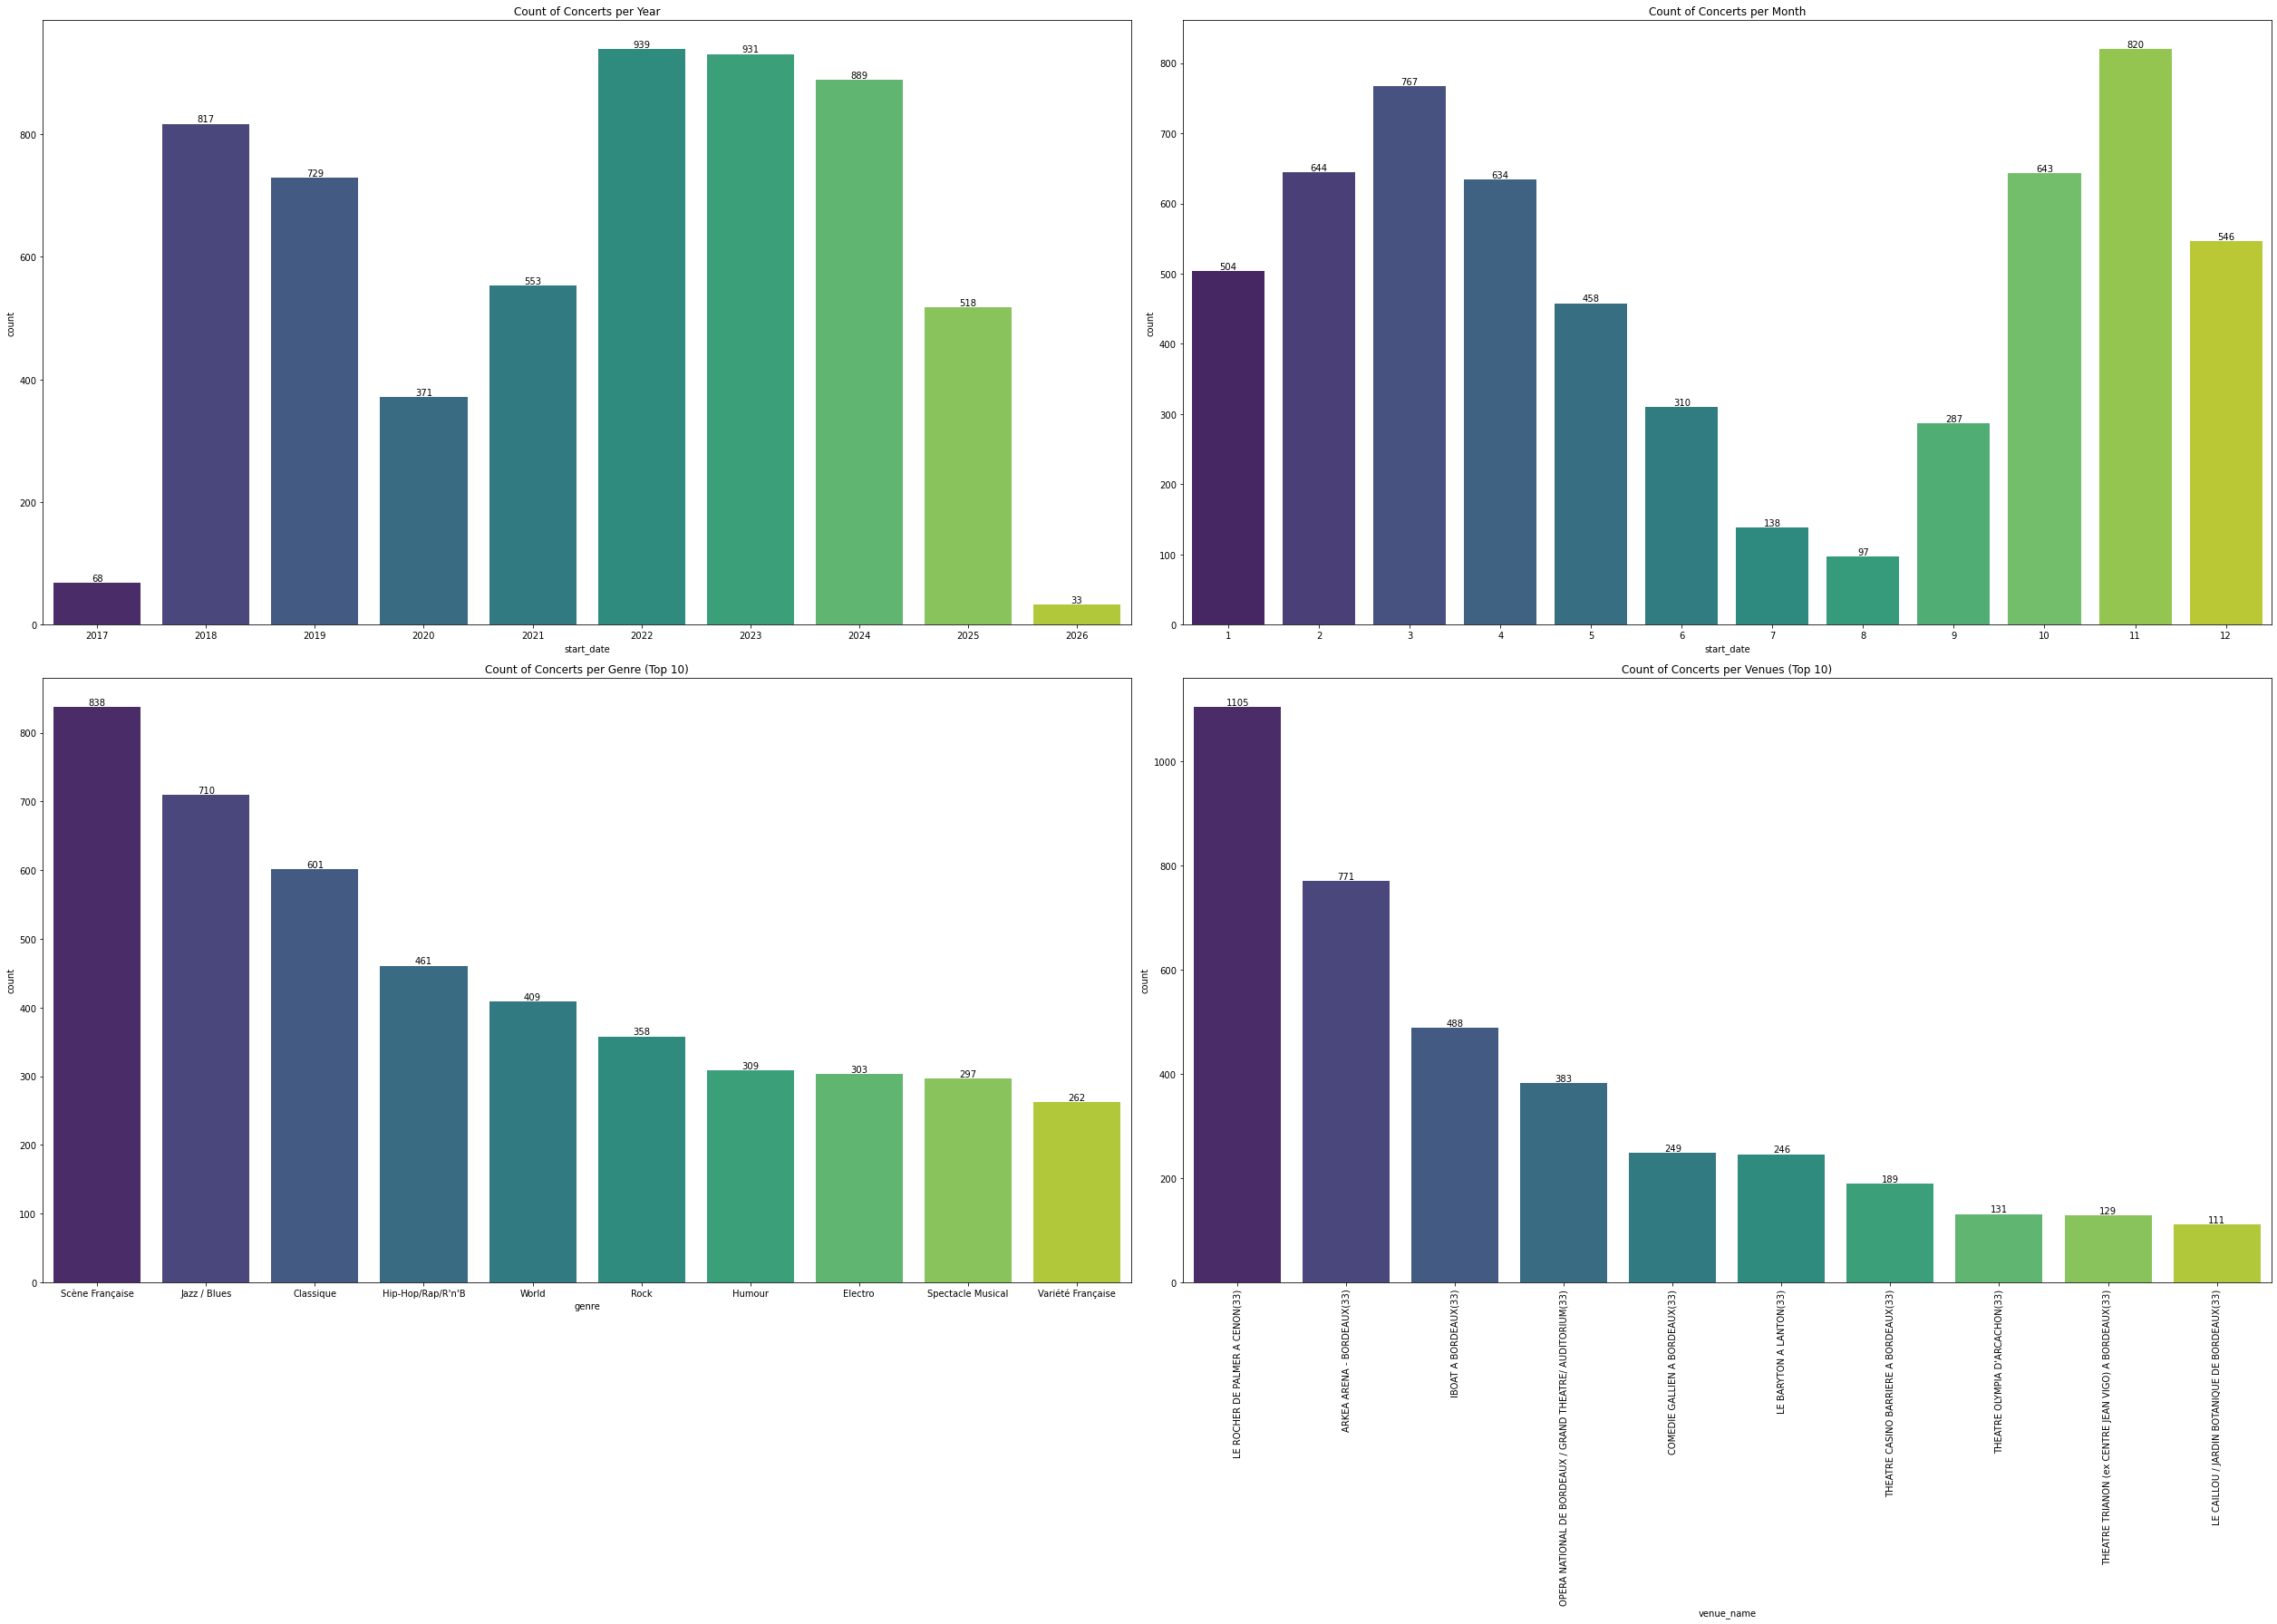

In [144]:
''' Vizualisation of the general distribution of events over time and genre
'''

plt.figure(figsize=(35, 25))

# Concerts per year
plt.subplot(2, 2, 1)
plt.title('Count of Concerts per Year')
count_year = sns.countplot(x=concerts.start_date.dt.year, data=concerts, palette='viridis')
for i in count_year.containers[0]:
    height = i.get_height()
    count_year.text(i.get_x() + i.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom')

# Concerts per month
plt.subplot(2, 2, 2)
plt.title('Count of Concerts per Month')
count_month = sns.countplot(x=concerts.start_date.dt.month, data=concerts, palette='viridis')
for i in count_month.containers[0]:
    height = i.get_height()
    count_month.text(i.get_x() + i.get_width()/2., height,
                     f'{int(height)}', ha='center', va='bottom')

# Top 10 concerts by genre
plt.subplot(2, 2, 3)
plt.title('Count of Concerts per Genre (Top 10)')
count_genre = sns.countplot(x='genre', data=concerts, 
                             order=concerts.genre.value_counts().index[:10], 
                             palette='viridis')
for i in count_genre.containers[0]:
    height = i.get_height()
    count_genre.text(i.get_x() + i.get_width()/2., height,
                     f'{int(height)}', ha='center', va='bottom')
    
# Top 10 concerts by venues
plt.subplot(2, 2, 4)
plt.title('Count of Concerts per Venues (Top 10)')
count_venues = sns.countplot(x='venue_name', data=concerts, 
                             order=concerts.venue_name.value_counts().index[:10], 
                             palette='viridis')
plt.xticks(rotation = 90)

for i in count_venues.containers[0]:
    height = i.get_height()
    count_venues.text(i.get_x() + i.get_width()/2., height,
                     f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../Graphs/global_distribution.png')
plt.show()


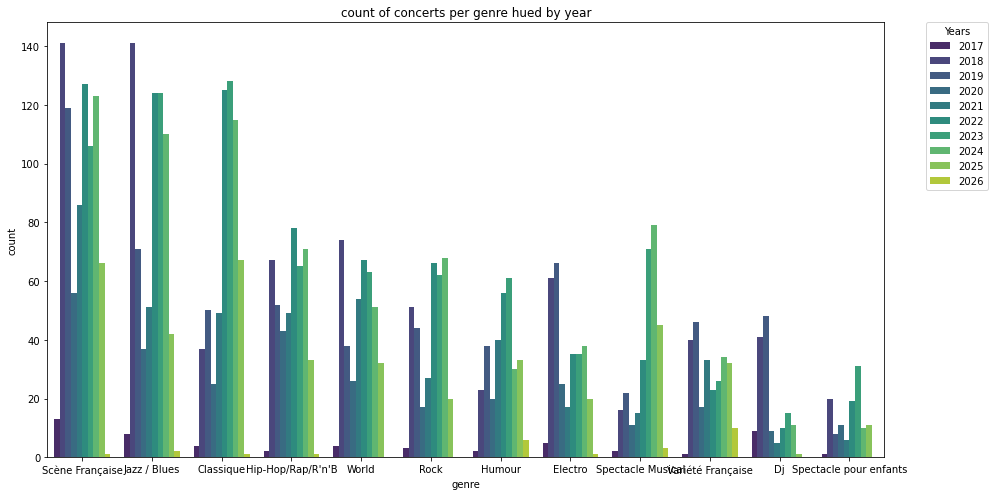

In [145]:
plt.figure(figsize=(15,8))
plt.title('count of concerts per genre hued by year')
sns.countplot(x='genre',data = concerts, hue = concerts.start_date.dt.year,palette='viridis', order = concerts.genre.value_counts().index[:12])
plt.legend(title='Years', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('../Graphs/concerts_distribution_genre_hued.png')

In [146]:
def plot_top_genres_by_year(df, top_n=10):
    """
    Create a stacked bar chart showing distribution of top N genres across years.
    Other genres are grouped into an 'Other' category.
    
    Parameters:
    top_n (int): Number of top genres to show separately (default: 10)
    """
    # Convert date to datetime if not already
    df['year'] = df['start_date'].dt.year
    
    # Get the top N genres across all years
    top_genres = df['genre'].value_counts().nlargest(top_n).index
    
    # Create a copy of the dataframe and replace non-top genres with 'Other'
    df_plot = df.copy()
    df_plot['genre'] = df_plot['genre'].apply(lambda x: x if x in top_genres else 'Other')
    
    # Create pivot table for genre counts by year
    genre_by_year = pd.crosstab(df_plot['year'], df_plot['genre'])
    
    # Reorder columns to put 'Other' at the end if it exists
    if 'Other' in genre_by_year.columns:
        cols = [col for col in genre_by_year.columns if col != 'Other'] + ['Other']
        genre_by_year = genre_by_year[cols]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Get a color palette with enough colors for top genres plus 'Other'
    n_genres = len(genre_by_year.columns)
    colors = sns.color_palette("Paired", n_genres)
    if 'Other' in genre_by_year.columns:
        # Use gray for 'Other' category
        colors = colors[:-1] + ['#808080']
    
    # Create stacked bars
    bottom = np.zeros(len(genre_by_year.index))
    
    for idx, genre in enumerate(genre_by_year.columns):
        values = genre_by_year[genre].values
        bars = ax.bar(genre_by_year.index, values, bottom=bottom, 
               label=genre, color=colors[idx])
        # Add percentage labels in the middle of each segment
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if height >= 5:  # Only show label if segment is at least 5%
                ax.text(bar.get_x() + bar.get_width()/2, 
                       bottom[i] + height/2,
                       f'{int(height)}',
                       ha='center', va='center')
        bottom += values
         
    
    # Customize the plot
    plt.title(f'Distribution of Top {top_n} Genres by Year', fontsize=14, pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Events', fontsize=12)
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # Add legend
    plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), 
              loc='upper left', borderaxespad=0.)
    
    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Print the total number of events in 'Other' category if it exists
    if 'Other' in genre_by_year.columns:
        other_total = genre_by_year['Other'].sum()
        total_events = genre_by_year.sum().sum()
        other_percentage = (other_total / total_events) * 100
        print(f"Events in 'Other' category: {other_total:,} ({other_percentage:.1f}% of total)")
    
    # Adjust layout to prevent legend cutoff and save the figure
    plt.tight_layout()
    plt.savefig('../Graphs/top_genre.png')
    
    return fig



/Users/Marine/opt1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Events in 'Other' category: 1,012 (17.6% of total)


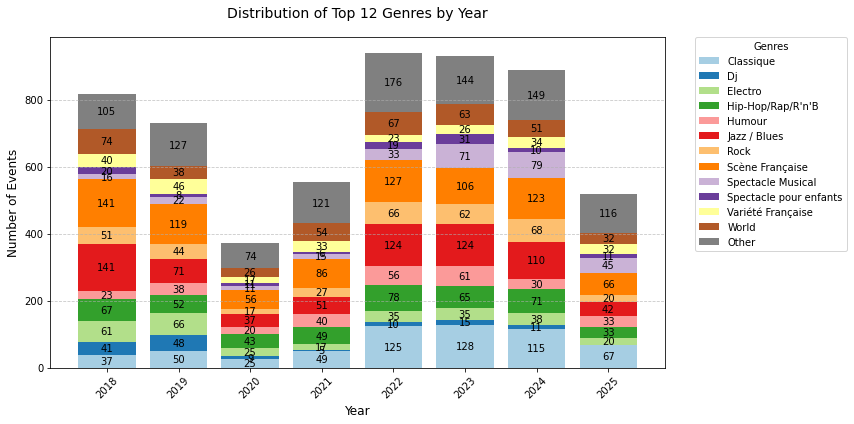

In [147]:
# Create the plot
fig = plot_top_genres_by_year(concerts_18_25,12) 
plt.show()

> By selecting the top 12 genres, we get over 80% of our dataset represented, and a better readability

In [148]:


def plot_top_genres_by_year_normalized(df, top_n=10):
    """
    Create a normalized stacked bar chart showing distribution of top N genres across years.
    Each year will sum to 100%.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with columns 'genre', 'date'
    top_n (int): Number of top genres to show separately (default: 10)
    """
    # Convert date to datetime if not already
    df['year'] = df['start_date'].dt.year
    
    # Get the top N genres across all years
    top_genres = df['genre'].value_counts().nlargest(top_n).index
    
    # Create a copy of the dataframe and replace non-top genres with 'Other'
    df_plot = df.copy()
    df_plot['genre'] = df_plot['genre'].apply(lambda x: x if x in top_genres else 'Other')
    
    # Create pivot table for genre counts by year
    genre_by_year = pd.crosstab(df_plot['year'], df_plot['genre'], normalize='index') * 100
    
    # Reorder columns to put 'Other' at the end if it exists
    if 'Other' in genre_by_year.columns:
        cols = [col for col in genre_by_year.columns if col != 'Other'] + ['Other']
        genre_by_year = genre_by_year[cols]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Get a color palette with enough colors for top genres plus 'Other'
    n_genres = len(genre_by_year.columns)
    colors = sns.color_palette("Paired", n_genres)
    if 'Other' in genre_by_year.columns:
        # Use gray for 'Other' category
        colors = colors[:-1] + ['#808080']
    
    # Create stacked bars
    bottom = np.zeros(len(genre_by_year.index))
    
    for idx, genre in enumerate(genre_by_year.columns):
        values = genre_by_year[genre].values
        bars = ax.bar(genre_by_year.index, values, bottom=bottom, 
                     label=genre, color=colors[idx])
        
        # Add percentage labels in the middle of each segment
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if height >= 5:  # Only show label if segment is at least 5%
                ax.text(bar.get_x() + bar.get_width()/2, 
                       bottom[i] + height/2,
                       f'{height:.1f}%',
                       ha='center', va='center')
        bottom += values
    
    # Customize the plot
    plt.title(f'Distribution of Top {top_n} Genres by Year (Normalized)', fontsize=14, pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Percentage of Events', fontsize=12)
    
    # Set y-axis to go from 0 to 100
    plt.ylim(0, 100)
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # Add legend
    plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), 
              loc='upper left', borderaxespad=0.)
    
    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Print the average percentage of 'Other' category if it exists
    if 'Other' in genre_by_year.columns:
        other_mean = genre_by_year['Other'].mean()
        print(f"Average percentage in 'Other' category: {other_mean:.1f}%")
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    plt.savefig('../Graphs/top_genre_normalized.png')
    
    return fig

/Users/Marine/opt1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Average percentage in 'Other' category: 18.2%


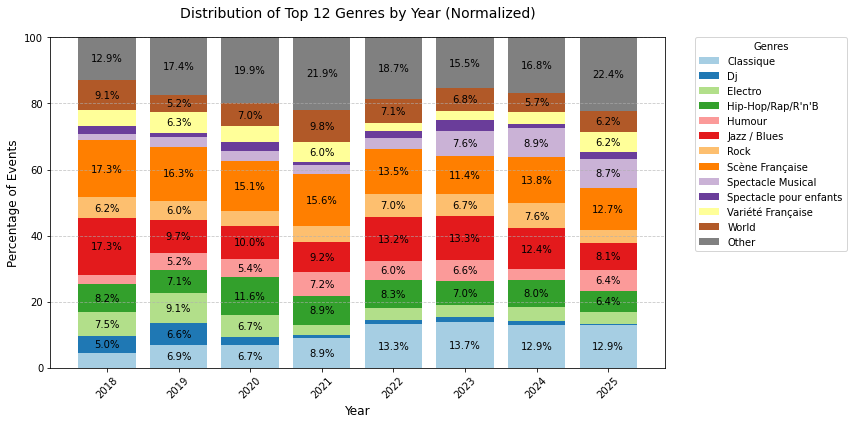

In [149]:
# Create the plot
fig = plot_top_genres_by_year_normalized(concerts_18_25, top_n=12)
plt.show()

> **insights : classique genre tends to grow over years, as musical and kids events, in favor of the electro / dj  that seem to record the most important decrease over the period**

* we might dive into those two genre to see the venues that welcome those genre the most 

## 2.Now, let's investigate any potential seasonality

In [150]:
pd.reset_option('^display.', silent=True) 

In [151]:
#pd.set_option('display.max_rows', None)
pt_count_month_year_bygenre = concerts_18_25.pivot_table(values =concerts_18_25, index=[concerts_18_25.start_date.dt.month,concerts_18_25.start_date.dt.year],columns='genre',aggfunc=({'genre':'count'}))
#pt_count_month_year_bygenre.head(12*6)
pt_count_month_year_bygenre

genre                                      \
genre                 Ciné-concert Cirque Classique Country Danse   Dj   
start_date start_date                                                    
1          2018                NaN    NaN       2.0     NaN   1.0  2.0   
           2019                1.0    NaN       7.0     NaN   NaN  5.0   
           2020                1.0    NaN       5.0     NaN   1.0  2.0   
           2021                NaN    NaN       NaN     NaN   NaN  NaN   
           2022                NaN   10.0      12.0     NaN   NaN  NaN   
...                            ...    ...       ...     ...   ...  ...   
12         2021                2.0    6.0      13.0     NaN   1.0  NaN   
           2022                1.0    2.0      15.0     NaN   NaN  NaN   
           2023                1.0    2.0       9.0     NaN   2.0  1.0   
           2024                2.0    2.0      22.0     NaN   3.0  NaN   
           2025                NaN    NaN       2.0     NaN   2.0  NaN   

                                                                ...       \
genre                 Electro Fanfare Gospel Hip-Hop/Rap/R'n'B  ... Rock   
start_date start_date                                           ...        
1          2018           7.0     NaN    NaN               2.0  ...  3.0   
           2019           5.0     NaN    NaN               1.0  ...  1.0   
           2020           4.0     NaN    NaN               4.0  ...  4.0   
           2021           NaN     NaN    NaN               3.0  ...  2.0   
           2022           2.0     NaN    NaN               6.0  ...  2.0   
...                       ...     ...    ...               ...  ...  ...   
12         2021           1.0     NaN    NaN               5.0  ...  2.0   
           2022           1.0     NaN    2.0               7.0  ...  3.0   
           2023           3.0     NaN    NaN               7.0  ...  7.0   
           2024           4.0     NaN    NaN              11.0  ...  9.0   
           2025           NaN     NaN    NaN               NaN  ...  NaN   

                                                                          \
genre                 Scène Française Soul/Funk/Groove Spectacle Musical   
start_date start_date                                                      
1          2018                   6.0              1.0               2.0   
           2019                  11.0              NaN               2.0   
           2020                   6.0              NaN               NaN   
           2021                   1.0              2.0               3.0   
           2022                  10.0              1.0               5.0   
...                               ...              ...               ...   
12         2021                   6.0              1.0               5.0   
           2022                  13.0              3.0               2.0   
           2023                   7.0              2.0               9.0   
           2024                   9.0              NaN              12.0   
           2025                   2.0              NaN               1.0   

                                                                  \
genre                 Spectacle pour enfants Spectacle/évènement   
start_date start_date                                              
1          2018                          4.0                 NaN   
           2019                          NaN                 NaN   
           2020                          1.0                 1.0   
           2021                          1.0                 NaN   
           2022                          3.0                 1.0   
...                                      ...                 ...   
12         2021                          2.0                 NaN   
           2022                          6.0                 1.0   
           2023                          7.0                 1.0   
           2024                          NaN  

Seasonality can be observe two ways : 
* Is it a trend observed over the year meaning the behavior maintains on the month throughout the years
* One each year is there seasonality observable ? 

First will try to show if there is seasonality in each year, second one will try to see if the monthly volume is stable over the years

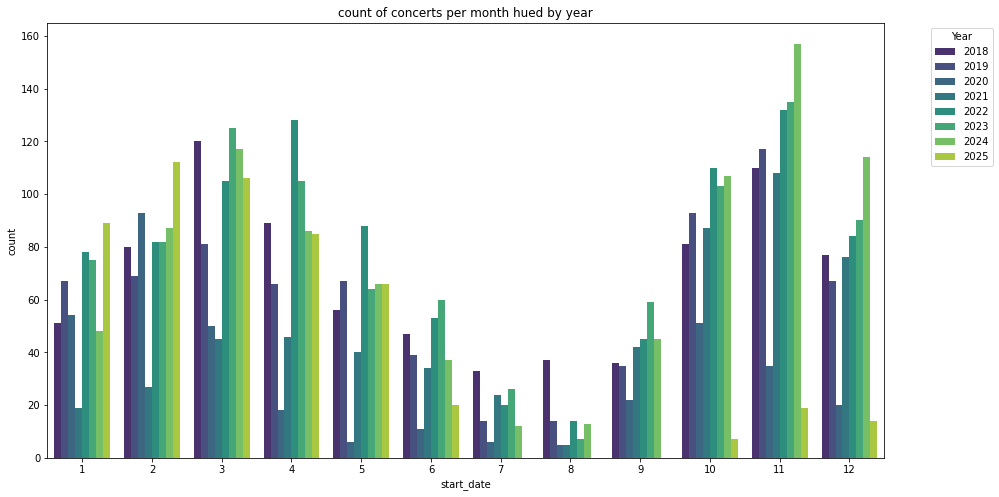

In [152]:
plt.figure(figsize=(15,8))
plt.title('count of concerts per month hued by year')
sns.countplot(x=concerts_18_25.start_date.dt.month ,data = concerts_18_25, hue =concerts_18_25.start_date.dt.year,palette = 'viridis')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../Graphs/seasonality_months_years.png')

In [153]:
# Let's create a pivot table to display the distributioon of events through years and month

concerts_18_25['month']=concerts_18_25.start_date.dt.month
pd.set_option('display.max_columns', None)
pivot_year_month = pd.pivot_table(concerts_18_25, columns=['month'],index = concerts_18_25.start_date.dt.year,
                       aggfunc={'month': "count"})
pivot_year_month

/Users/Marine/opt1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


month                                                            \
month         1      2      3      4     5     6     7     8     9      10   
start_date                                                                   
2018        51.0   80.0  120.0   89.0  56.0  47.0  33.0  37.0  36.0   81.0   
2019        67.0   69.0   81.0   66.0  67.0  39.0  14.0  14.0  35.0   93.0   
2020        54.0   93.0   50.0   18.0   6.0  11.0   6.0   5.0  22.0   51.0   
2021        19.0   27.0   45.0   46.0  40.0  34.0  24.0   5.0  42.0   87.0   
2022        78.0   82.0  105.0  128.0  88.0  53.0  20.0  14.0  45.0  110.0   
2023        75.0   82.0  125.0  105.0  64.0  60.0  26.0   7.0  59.0  103.0   
2024        48.0   87.0  117.0   86.0  66.0  37.0  12.0  13.0  45.0  107.0   
2025        89.0  112.0  106.0   85.0  66.0  20.0   NaN   NaN   NaN    7.0   

                          
month          11     12  
start_date                
2018        110.0   77.0  
2019        117.0   67.0  
2020         35.0   20.0  
2021        108.0   76.0  
2022        132.0   84.0  
2023        135.0   90.0  
2024        157.0  114.0  
2025         19.0   14.0

In [154]:
# Let's create a pivot table to display the distributioon of events through years and month

pd.options.display.float_format = '{:.2%}'.format

concerts_18_25['month']=concerts_18_25.start_date.dt.month
pd.set_option('display.max_columns', None)
pivot_year_month_normalized = pd.crosstab(concerts_18_25['month'],concerts.start_date.dt.year,normalize='columns',margins = True)
pivot_year_month_normalized

/Users/Marine/opt1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


start_date,2018,2019,2020,2021,2022,2023,2024,2025,All
month,,,,,,,,,
1,6.24%,9.19%,14.56%,3.44%,8.31%,8.06%,5.40%,17.18%,8.37%
2,9.79%,9.47%,25.07%,4.88%,8.73%,8.81%,9.79%,21.62%,11.00%
3,14.69%,11.11%,13.48%,8.14%,11.18%,13.43%,13.16%,20.46%,13.03%
4,10.89%,9.05%,4.85%,8.32%,13.63%,11.28%,9.67%,16.41%,10.84%
5,6.85%,9.19%,1.62%,7.23%,9.37%,6.87%,7.42%,12.74%,7.88%
6,5.75%,5.35%,2.96%,6.15%,5.64%,6.44%,4.16%,3.86%,5.24%
7,4.04%,1.92%,1.62%,4.34%,2.13%,2.79%,1.35%,0.00%,2.35%
8,4.53%,1.92%,1.35%,0.90%,1.49%,0.75%,1.46%,0.00%,1.65%
9,4.41%,4.80%,5.93%,7.59%,4.79%,6.34%,5.06%,0.00%,4.94%


In [155]:
pd.reset_option('^display.', silent=True) # To force default format in case of running % format 

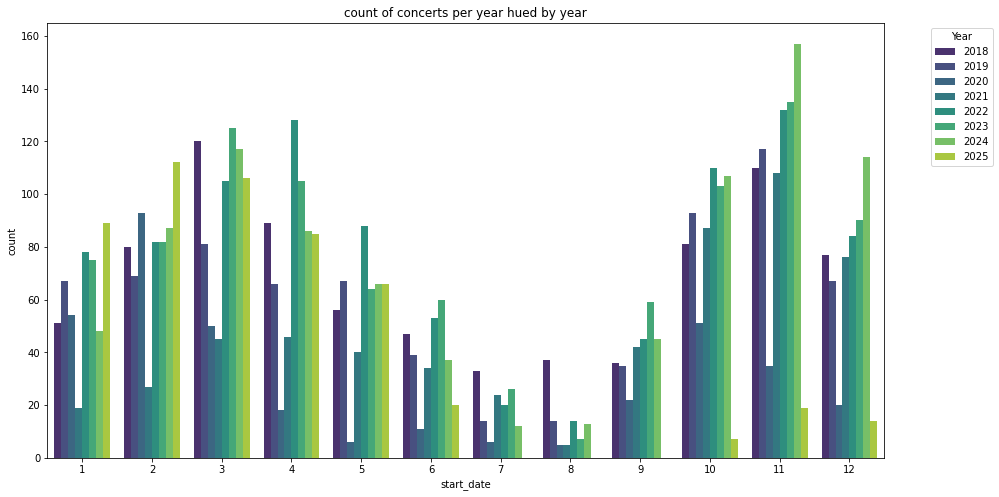

In [156]:
plt.figure(figsize=(15,8))
plt.title('count of concerts per year hued by year')
sns.countplot(x=concerts_18_25.start_date.dt.month ,data = concerts_18_25, hue =concerts_18_25.start_date.dt.year,palette = 'viridis')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../Graphs/seasonality_months_years.png')

This graph clearly shows a decrease during summenr, from may/june to september, But we can also see that the decrease is way sharper after covid, prio to 2019, the count of events decreased less in june/september




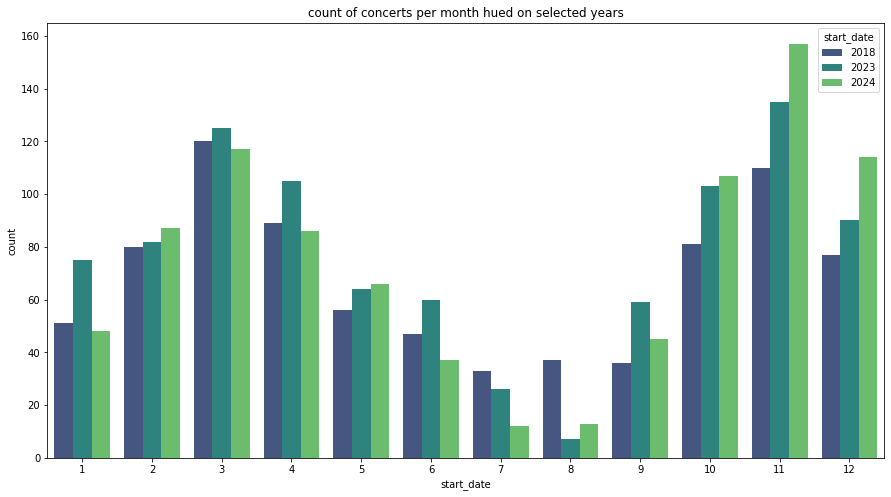

In [157]:
plt.figure(figsize=(15,8))
plt.title('count of concerts per month hued on selected years')
concerts_filtered = concerts[concerts.start_date.dt.year.isin(['2018','2023','2024'])]
sns.countplot(x=concerts_filtered.start_date.dt.month ,data = concerts_filtered, hue = concerts_filtered.start_date.dt.year ,palette = 'viridis')
plt.savefig('../Graphs/Seasonality_selected_years.png')

In [158]:
pd.reset_option('^display.', silent=True)

In [159]:
concerts_18_25.venue_name.str.endswith('(68)').sum()

0

In [160]:
concerts_18_25[concerts_18_25.venue_name.isin(concerts_18_25.venue_name.value_counts().index[:12])]

,event_type,city,venue_id,start_date,artist_id,venue_name,artist_name,genre,year,month
2,Concert,Bordeaux,opera-national-de-bordeaux--grand-theatre-audi...,2024-11-26 20:00:00,arcadi-volodos-49132,OPERA NATIONAL DE BORDEAUX / GRAND THEATRE/ AU...,ARCADI VOLODOS,Classique,2024,11
4,Concert,Cenon,le-rocher-de-palmer-a-cenon-34504,2024-11-26 20:30:00,barbara-pravi-165765,LE ROCHER DE PALMER A CENON(33),BARBARA PRAVI,Variété Française,2024,11
10,Concert,Bordeaux,opera-national-de-bordeaux--grand-theatre-audi...,2024-11-27 20:00:00,edgar-moreau-83639,OPERA NATIONAL DE BORDEAUX / GRAND THEATRE/ AU...,EDGAR MOREAU,Classique,2024,11
11,Concert,Bordeaux,iboat-a-bordeaux-39764,2024-11-27 20:30:00,colours-in-the-street-108296,IBOAT A BORDEAUX(33),COLOURS IN THE STREET,Scène Française,2024,11
14,Concert,Cenon,le-rocher-de-palmer-a-cenon-34504,2024-11-27 20:30:00,alice-russell-31906,LE ROCHER DE PALMER A CENON(33),ALICE RUSSELL,Soul/Funk/Groove,2024,11
...,...,...,...,...,...,...,...,...,...,...
5449,Concert,Lanton,le-baryton-a-lanton-29825,2024-02-02 21:00:00,alexis-valet-149179,LE BARYTON A LANTON(33),ALEXIS VALET,Jazz / Blues,2024,2
5450,Concert,Lanton,le-baryton-a-lanton-29825,2024-01-27 21:00:00,night-passage-230527,LE BARYTON A LANTON(33),NIGHT PASSAGE,Jazz / Blues,2024,1
5451,Concert,Lanton,le-baryton-a-lanton-29825,2024-01-26 21:00:00,marakana-230525,LE BARYTON A LANTON(33),MARAKANA,Jazz / Blues,2024,1
5452,Concert,Lanton,le-baryton-a-lanton-29825,2024-01-20 21:00:00,muscat-ramblers-230105,LE BARYTON A LANTON(33),MU'SCAT RAMBLERS,Rock,2024,1


In [161]:
def plot_venue_genre_distribution(df, venue_col='venue_name', genre_col='genre'):
    """
    Create a normalized stacked bar chart showing genre distribution for top venues.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing one row per event with venue and genre columns
    venue_col : str
        Name of the venue column
    genre_col : str
        Name of the genre column
    """
    
    # Count events by venue and genre
    event_counts = df.groupby([venue_col, genre_col]).size().reset_index(name='count')
    
    # Get top 12 venues by total events
    venue_totals = event_counts.groupby(venue_col)['count'].sum().sort_values(ascending=False)
    top_venues = venue_totals.head(12).index


    # Filter for top venues
    df_top = event_counts[event_counts[venue_col].isin(top_venues)].copy()

    # For each venue, identify top 5 genres and combine others
    def process_venue(group):
        # Sort genres by count and get top 5
        sorted_genres = group.sort_values('count', ascending=False)
        top5 = sorted_genres.head(5)
        others = sorted_genres.iloc[5:] if len(sorted_genres) > 5 else pd.DataFrame()
        
        # Create 'Other' category if needed
        if len(others) > 0:
            other_sum = others['count'].sum()
            other_row = pd.DataFrame({
                venue_col: [top5.iloc[0][venue_col]],
                genre_col: ['Other'],
                'count': [other_sum]
            })
            return pd.concat([top5, other_row])
        return top5

    # Process each venue
    df_processed = pd.concat([process_venue(group) for _, group in df_top.groupby(venue_col)])

    # Create pivot table and normalize
    pivot_df = pd.pivot_table(
        df_processed,
        values='count',
        index=venue_col,
        columns=genre_col,
        fill_value=0
    )
    
    # Normalize to percentages
    pivot_df_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

    # Sort venues by total events
    pivot_df_pct = pivot_df_pct.reindex(top_venues)

    # Create color mapping for consistent colors across bars
    genres = [col for col in pivot_df_pct.columns if col != 'Other']
    colors = plt.cm.YlGnBu(np.linspace(0, 1, len(genres)))
    color_map = dict(zip(genres, colors))
    color_map['Other'] = '#cccccc'  # Grey for 'Other' category

    # Create the plot
    plt.figure(figsize=(15,8))
    ax =pivot_df_pct.plot(
        kind='bar',
        stacked=True,
        color=[color_map[g] for g in pivot_df_pct.columns],
        width=0.8
    )

    # Customize the plot
    plt.title('Event Distribution by Venue and Genre', pad=20)
    plt.xlabel('Venue')
    plt.ylabel('Percentage of Events')
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')
    
    # Add legend
    plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.savefig('../Graphs/venues_genres.png')
    plt.show()
    
    return plt.gcf()


/Users/Marine/opt1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:89: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


<Figure size 1080x576 with 0 Axes>

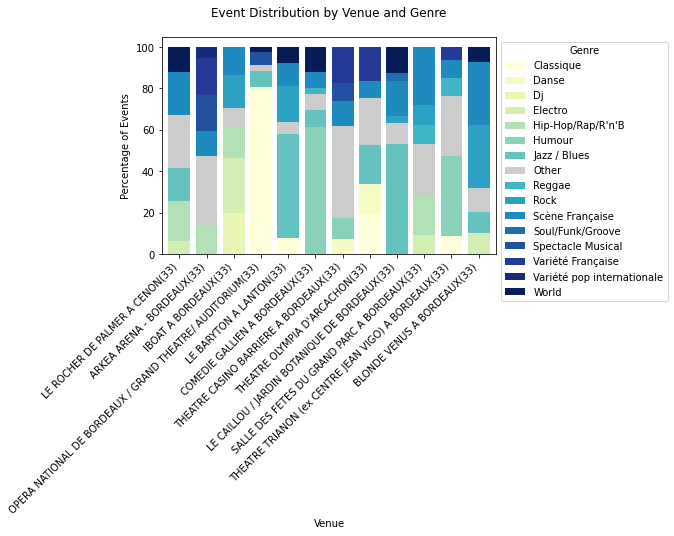

<Figure size 432x288 with 0 Axes>

In [162]:
fig = plot_venue_genre_distribution(concerts_18_25)
plt.show()

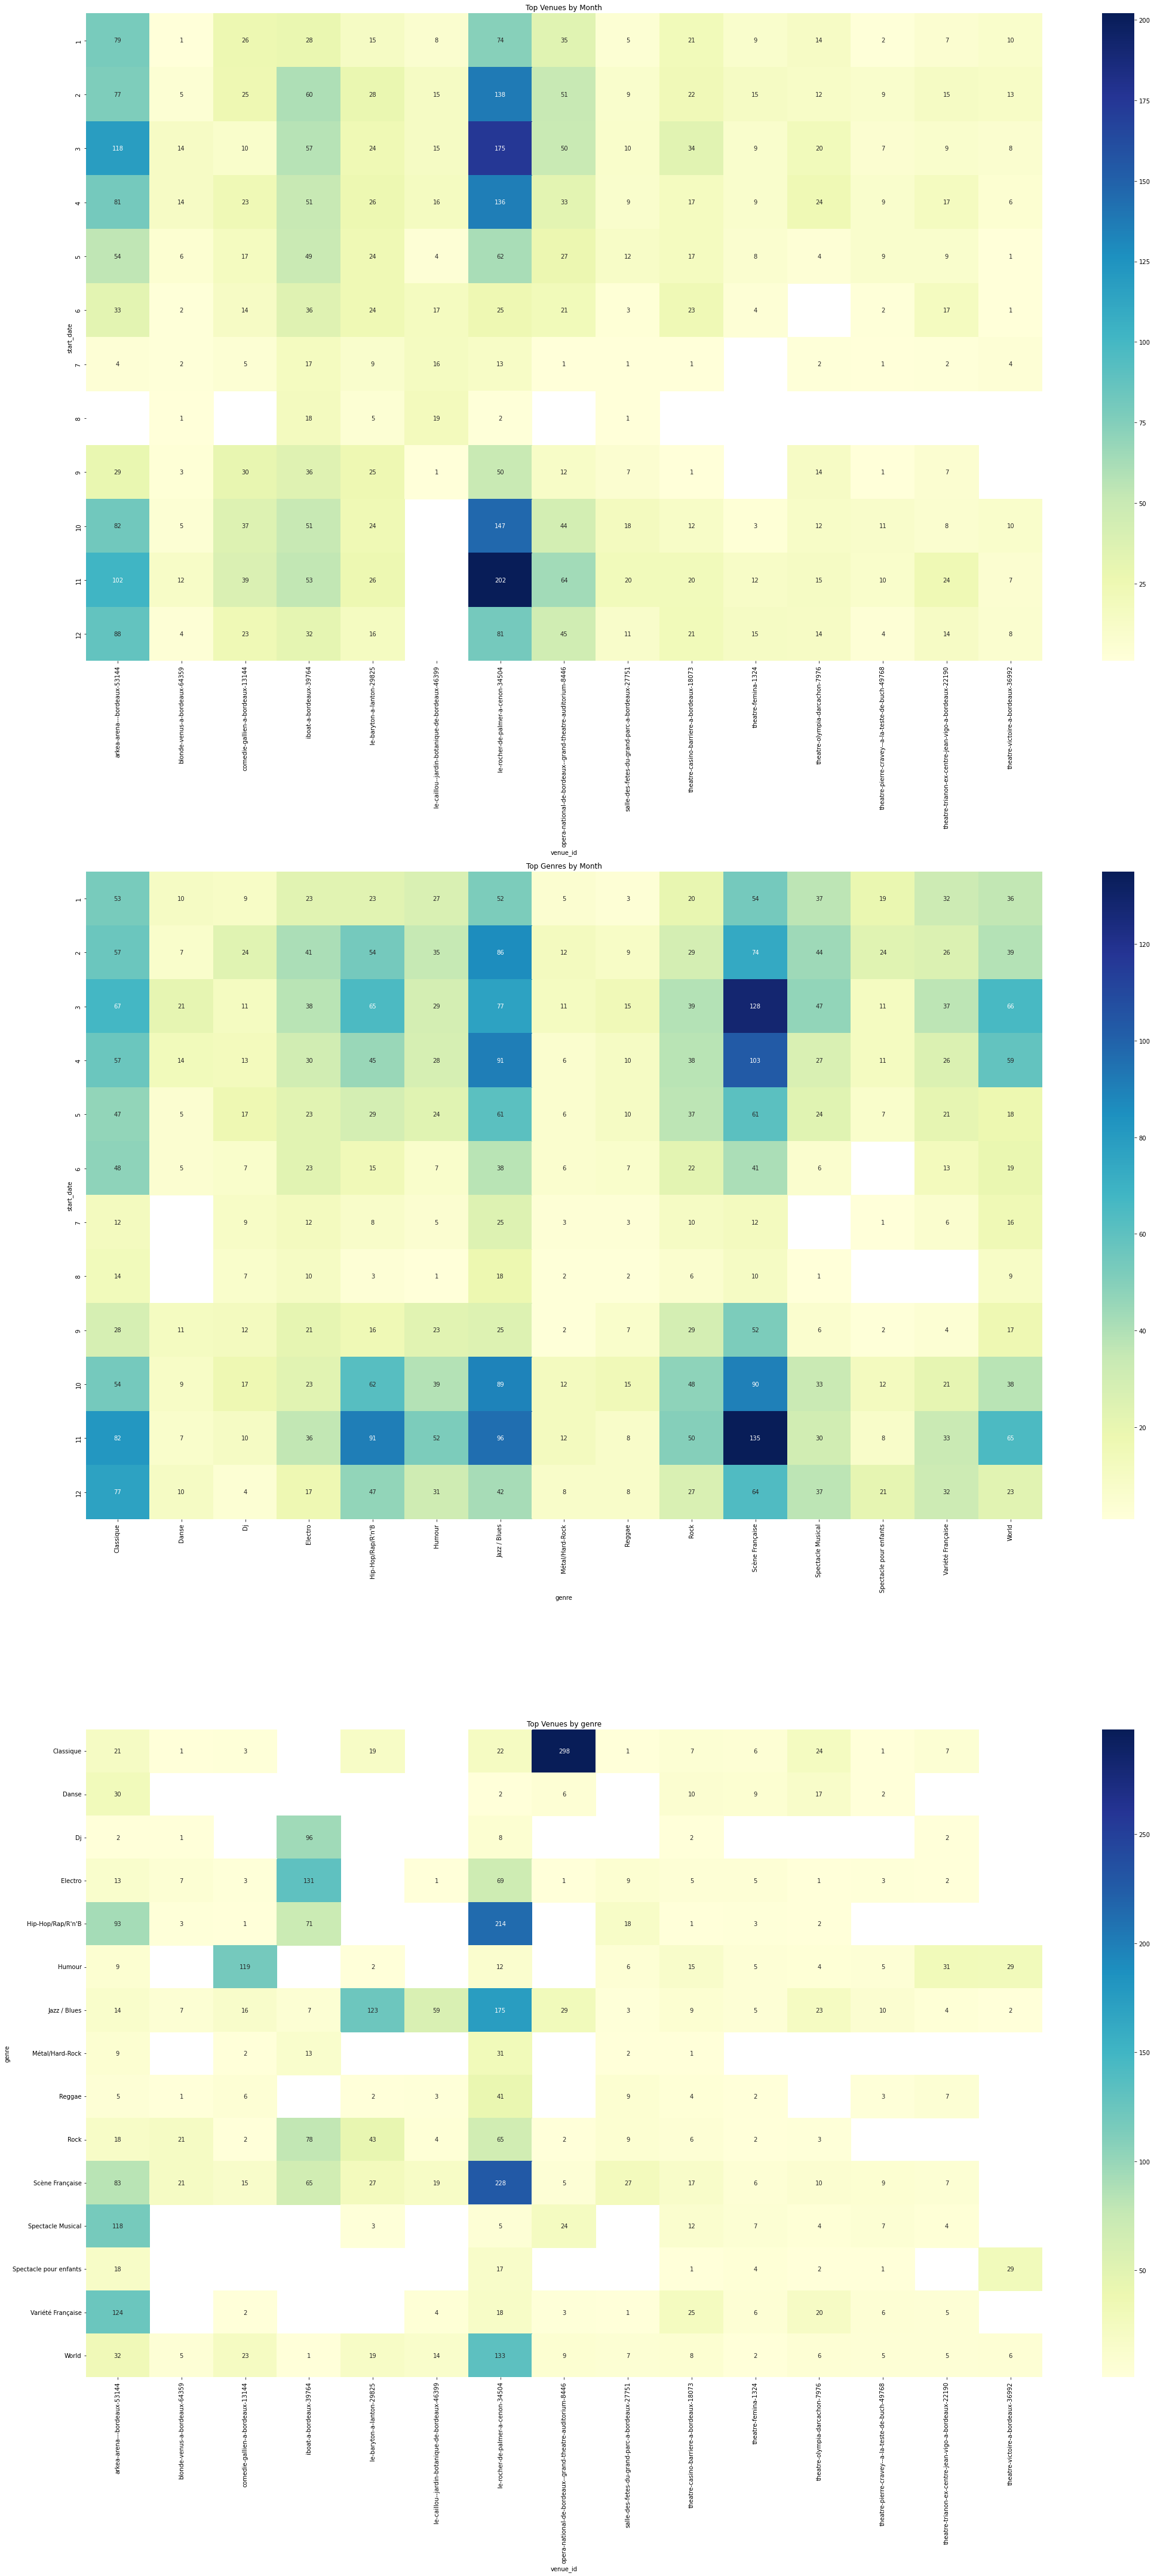

Seasonality Statistical Test:
Chi-square p-value: nan


In [163]:
# Monthly distribution by venue and genre


# keeping only most represented genre and venues
genres = concerts_18_25.genre.value_counts().index[:15]
venues = concerts_18_25.venue_id.value_counts().index[:15]

plt.figure(figsize=(30, 60))

# Venues by month

plt.subplot(3,1, 1)
plt.title('Top Venues by Month')
venues_by_month = concerts_18_25[concerts_18_25['venue_id'].isin(venues)].\
                groupby([concerts_18_25.start_date.dt.month, concerts_18_25.venue_id]).size().unstack()

sns.heatmap(venues_by_month, cmap='YlGnBu', annot=True, fmt='g')

# Genres by month
plt.subplot(3, 1, 2)
plt.title('Top Genres by Month')
genres_by_month = concerts_18_25[concerts_18_25['genre'].isin(genres)].groupby([concerts_18_25.start_date.dt.month, 'genre']).size().unstack()
sns.heatmap(genres_by_month, cmap='YlGnBu', annot=True, fmt='g')

# Venues by genre

plt.subplot(3,1, 3)
plt.title('Top Venues by genre')
venues_by_month = concerts_18_25[concerts_18_25['venue_id'].isin(venues)].\
                groupby([concerts_18_25[concerts_18_25['genre'].isin(genres)].genre, concerts_18_25.venue_id]).size().unstack()

sns.heatmap(venues_by_month, cmap='YlGnBu', annot=True, fmt='g')


plt.tight_layout()
plt.savefig('../Graphs/seasonality.png')
plt.show()

# Statistical significance of seasonality


print("Seasonality Statistical Test:")
chi2, p_value, dof, expected = stats.chi2_contingency(genres_by_month)
print(f"Chi-square p-value: {p_value}")


> on the seasonality, confirmed with peaks during cold months like february and november for concerts like musicals or family events

> On the venue side,  3 venues stand out : Arkea, Opera national and Iboat. 
For reference : 
    Arkea is the main cultural event room in Bordeaux 
    Opera is obviously the Bordeaux's opera, gathering mostly classic events 
    Iboat is a concert venue / club 


* Arkea is very ecclectic is genre of events and present a trend over the year with fewer concerts during summer
* Iboat specialized in Electro/ DJ/ Hip-hop and Rock event, and contrarly to the other venues, presents a less important decrease of venues during summer
* Opera accounts for most of classical events naturally 

Regarding genre seasonality, two things can be noted : 
* family or kids friendly events almost account for 0 during summer 
* electro, dj and jazz club genre are heavenly represented over the year even during summer 

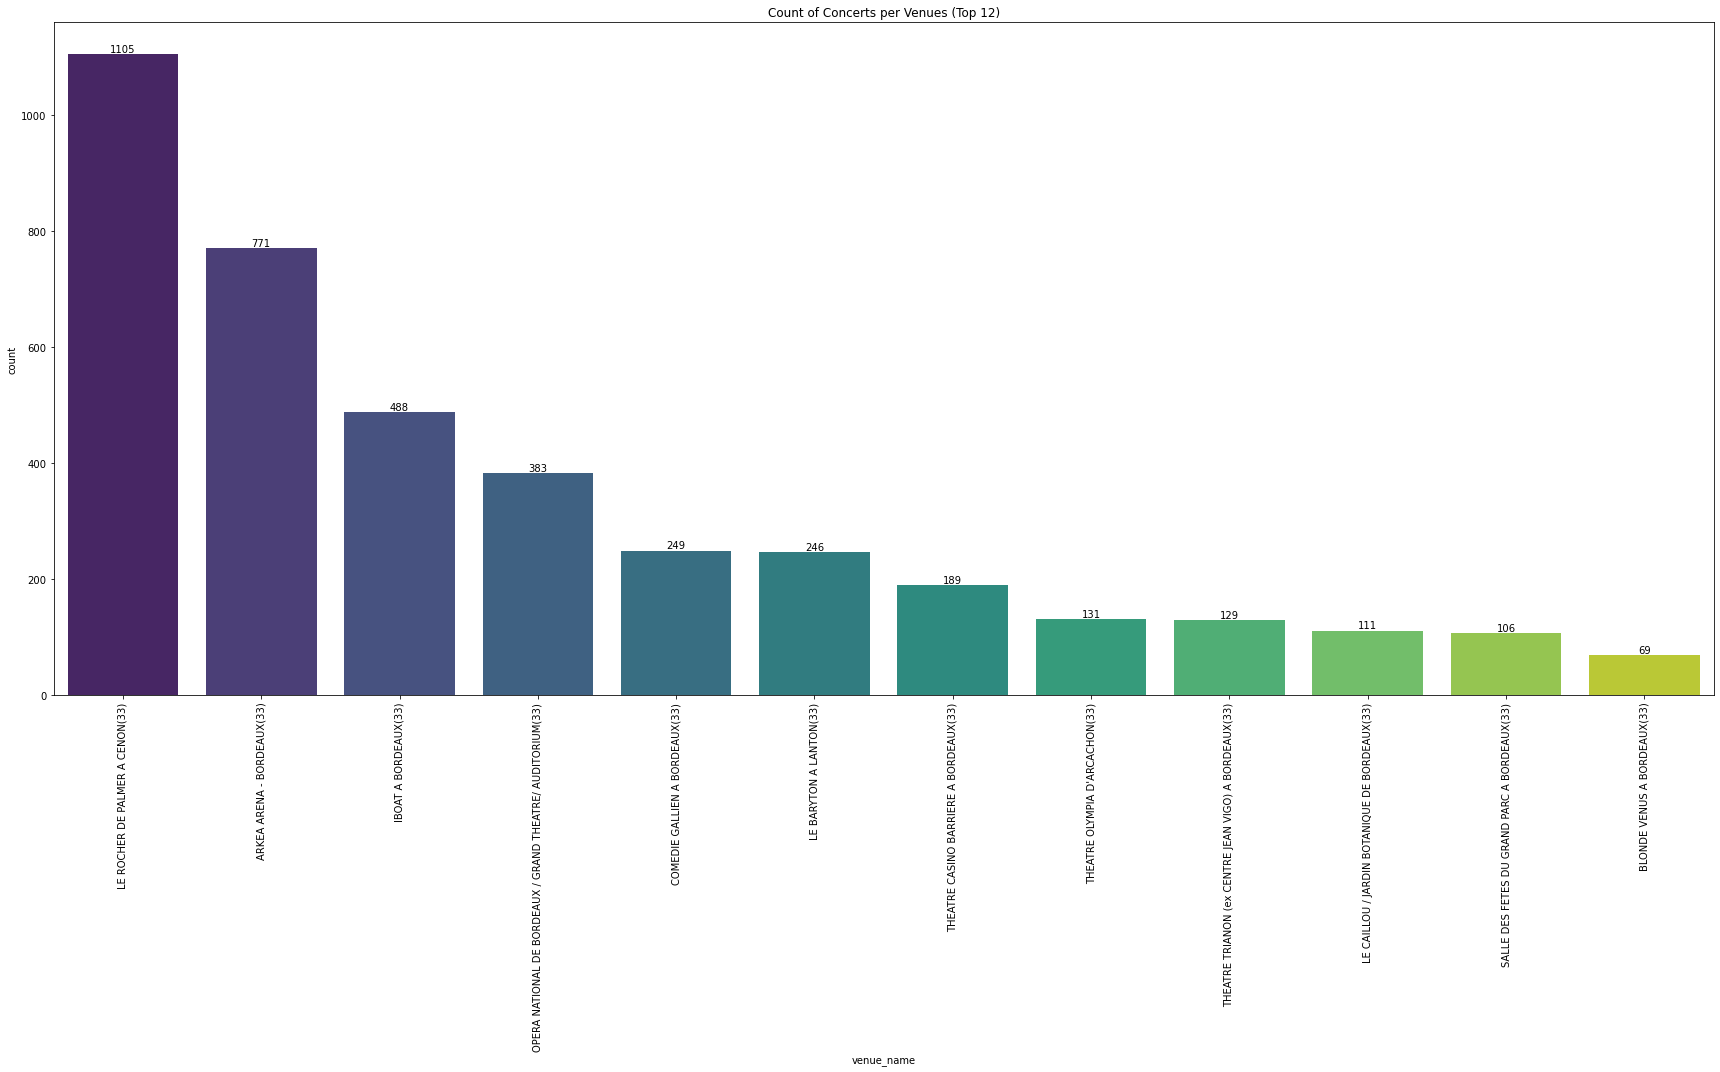

In [164]:
# Top 10 concerts by venues
plt.figure(figsize=(24,15))
plt.title('Count of Concerts per Venues (Top 12)')
count_venues = sns.countplot(x='venue_name', data=concerts, 
                             order=concerts.venue_name.value_counts().index[:12], 
                             palette='viridis')
plt.xticks(rotation = 90)

for i in count_venues.containers[0]:
    height = i.get_height()
    count_venues.text(i.get_x() + i.get_width()/2., height,
                     f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../Graphs/venue_top_distribution.png')
plt.show()


## Venues specialization and activity

In [170]:
def analyze_venue_specialization(events_df, start_year, end_year, min_events=10, genre_threshold=0.1):
    """
    Analyze venue genre specialization with significant genre threshold
    
    Parameters:
    events_df (pandas.DataFrame): DataFrame with events
    start_year (int): Start of observation period
    end_year (int): End of observation period
    min_events (int): Minimum total events for a venue
    genre_threshold (float): Minimum proportion to consider a genre significant
    
    Returns:
    Dict with analysis results
    """
    # Filter events within the specified year range
    events_df['year'] = events_df['start_date'].dt.year
    filtered_events = events_df[(events_df['year'] >= start_year) & (events_df['year'] <= end_year)]
    
    # Count total events per venue
    venue_total_events = filtered_events.groupby('venue_name').size()
    
    # Select venues with at least min_events
    qualified_venues = venue_total_events[venue_total_events >= min_events].index # list of venues 
    
    # Filter events for qualified venues
    qualified_events = filtered_events[filtered_events['venue_name'].isin(qualified_venues)]
    
    # Create genre counts per venue
    venue_genre_counts = qualified_events.groupby(['venue_name', 'genre']).size().unstack(fill_value=0)
    
    # Normalize to get proportions
    venue_genre_proportions = venue_genre_counts.div(venue_genre_counts.sum(axis=1), axis=0)
    
    # Filter for significant genres
    significant_genres_mask = (venue_genre_proportions >= genre_threshold).any(axis=0)
    significant_genres = venue_genre_proportions.columns[significant_genres_mask]
    
    # Subset dataframes to significant genres
    filtered_proportions = venue_genre_proportions[significant_genres]
    filtered_counts = venue_genre_counts[significant_genres]
    
    # Visualization
    plt.figure(figsize=(20, 30))
    
    # Heatmap of Significant Genre Distribution
    plt.subplot(2, 1, 1)
    if not filtered_proportions.empty:
        sns.heatmap(filtered_proportions, 
                    annot=True, 
                    cmap='YlGnBu', 
                    fmt='.2f', 
                    cbar_kws={'label': 'Proportion'})
        plt.title(f'Significant Genre Distribution\n(Venues with {min_events}+ Events, >{genre_threshold*100:.0f}% Threshold)')
        plt.xlabel('Significant Genres')
        plt.ylabel('Venues')
    
    # Scatter plot with total events as color
    plt.subplot(2, 1, 2)
    # Calculate entropy and dominant genre percentage
    venue_entropies = []
    dominant_percentages = []
    total_events = []
    
    for venue in filtered_proportions.index:
        venue_genres = filtered_proportions.loc[venue]
        # Entropy calculation
        entropy = -np.sum(venue_genres * np.log2(venue_genres + 1e-10))
        venue_entropies.append(entropy)
        
        # Dominant genre percentage
        dominant_percentage = venue_genres.max() * 100
        dominant_percentages.append(dominant_percentage)
        
        # Total events for this venue
        total_events.append(venue_genre_counts.loc[venue].sum())
    
    scatter = plt.scatter(venue_entropies, 
                          dominant_percentages, 
                          c=total_events, 
                          cmap='viridis', 
                          s=100)
    plt.colorbar(scatter, label='Total Number of Events')
    plt.xlabel('Genre Diversity (Entropy)')
    plt.ylabel('Dominant Genre Percentage')
    plt.title('Venue Genre Specialization')
    
    # Annotate points with venue IDs
#     for i, venue in enumerate(filtered_proportions.index):
#         plt.annotate(str(venue), (venue_entropies[i], dominant_percentages[i]))
    
    plt.tight_layout()
    plt.savefig('../Graphs/venues_genre_concentration.png')
    plt.show()
    
    return {
        'genre_distribution': filtered_proportions,
        'venue_details': filtered_counts
    }

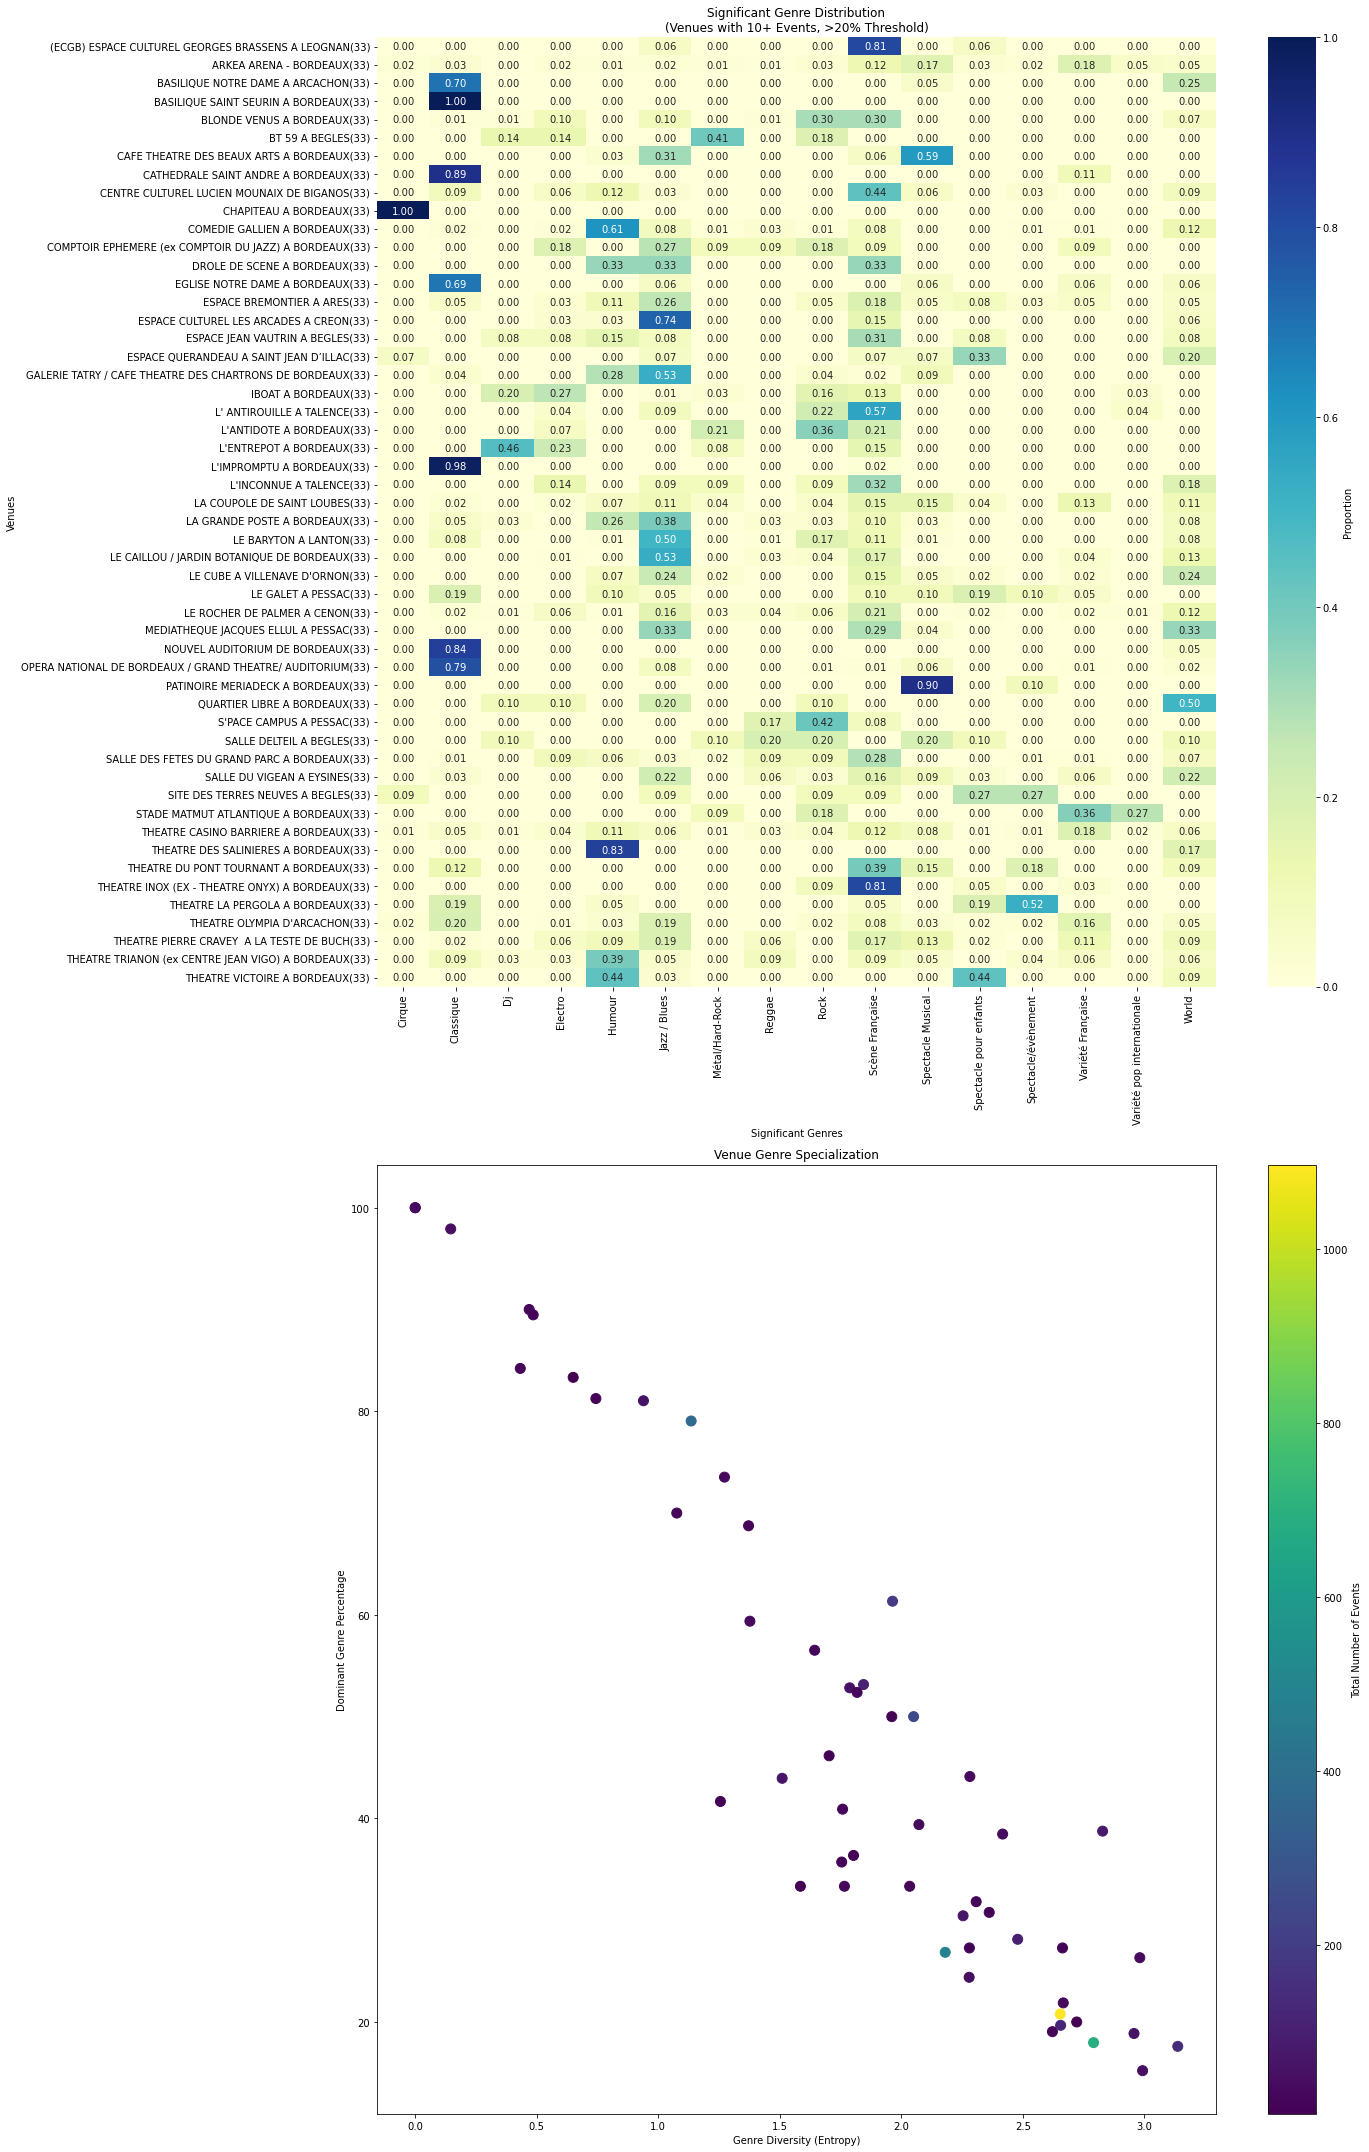

In [171]:

specialization_results = analyze_venue_specialization(concerts, 2018, 2025, min_events=10, genre_threshold=0.2)




Here it is for this quick analysis into our dataset created from scratch!
